#**ORDER** **PRIORITY** **CLASSIFICATION** **MODEL** 

In [ ]:
#Importing Necessary Libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
#Reading Dataset into Python Environment 
data=pd.read_excel('/content/drive/MyDrive/DSA B4-Team12-Project/Global_Superstore2.xlsx')
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


# **UNDERSTATING** **THE** **DATA**

In [ ]:
#First 5 rows and last 5 rows
data.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [ ]:
data.tail(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
51285,29002,IN-2014-62366,19-06-2014,19-06-2014,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,...,OFF-FA-10000746,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,0.01,Medium
51286,35398,US-2014-102288,20-06-2014,24-06-2014,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,...,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.1100,0.01,Medium
51287,40470,US-2013-155768,02-12-2013,02-12-2013,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,...,OFF-EN-10001219,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",22.920,3,0.0,11.2308,0.01,High
51288,9596,MX-2012-140767,18-02-2012,22-02-2012,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,...,OFF-BI-10000806,Office Supplies,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,0.00,Medium
51289,6147,MX-2012-134460,22-05-2012,26-05-2012,Second Class,MC-18100,Mick Crebagga,Consumer,Tipitapa,Managua,...,OFF-PA-10004155,Office Supplies,Paper,"Eaton Computer Printout Paper, 8.5 x 11",61.380,3,0.0,1.8000,0.00,High


In [ ]:
#Dimension
data.shape

(51290, 24)

In [ ]:
#Columns of Data
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [ ]:
#Count of Unique value
data.nunique()

Row ID            51290
Order ID          25035
Order Date         1430
Ship Date          1464
Ship Mode             4
Customer ID        1590
Customer Name       795
Segment               3
City               3636
State              1094
Country             147
Postal Code         631
Market                7
Region               13
Product ID        10292
Category              3
Sub-Category         17
Product Name       3788
Sales             22995
Quantity             14
Discount             27
Profit            24575
Shipping Cost     10037
Order Priority        4
dtype: int64

In [ ]:
#Count of value in State, City, Country and Region
data['State'].value_counts()


California            2001
England               1499
New York              1128
Texas                  985
Ile-de-France          981
                      ... 
Lambayeque               1
Aveiro                   1
Lima                     1
Medea                    1
Matabeleland North       1
Name: State, Length: 1094, dtype: int64

In [ ]:
data['City'].value_counts()


New York City     915
Los Angeles       747
Philadelphia      537
San Francisco     510
Santo Domingo     443
                 ... 
Vesoul              1
Várzea Grande       1
Luanshya            1
Kissimmee           1
Victoria Falls      1
Name: City, Length: 3636, dtype: int64

In [ ]:
data['Country'].value_counts()


United States    9994
Australia        2837
France           2827
Mexico           2644
Germany          2065
                 ... 
Bahrain             2
South Sudan         2
Chad                2
Burundi             2
Eritrea             2
Name: Country, Length: 147, dtype: int64

In [ ]:

data['Region'].value_counts()

Central           11117
South              6645
EMEA               5029
North              4785
Africa             4587
Oceania            3487
West               3203
Southeast Asia     3129
East               2848
North Asia         2338
Central Asia       2048
Caribbean          1690
Canada              384
Name: Region, dtype: int64

In [ ]:
#Presence of Null values in data
data.isna().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [ ]:
#Statistical Details
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [ ]:
#dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [ ]:
#Skew of attribute distribution
print(data.skew())

Row ID          -6.006947e-18
Postal Code     -1.285255e-01
Sales            8.138080e+00
Quantity         1.360368e+00
Discount         1.387775e+00
Profit           4.157189e+00
Shipping Cost    5.863226e+00
dtype: float64


#**EXPLORATORY** **DATA** **ANALYSIS**

>Univariate Analysis

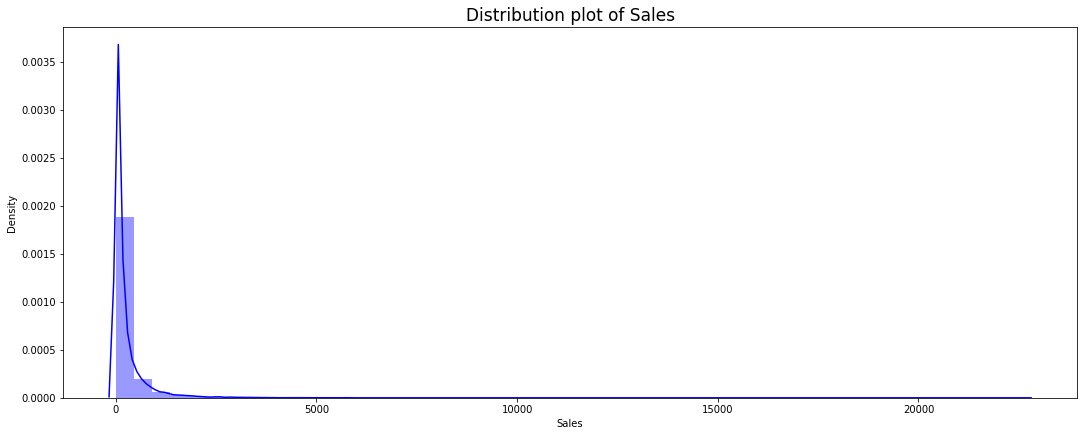

In [ ]:
#Distribution plot of Sales
plt.figure(figsize=(15,6))
sns.distplot(data['Sales'],color='b')
plt.title('Distribution plot of Sales',fontsize=17)
plt.xlabel('Sales')
plt.tight_layout(pad=0.5)

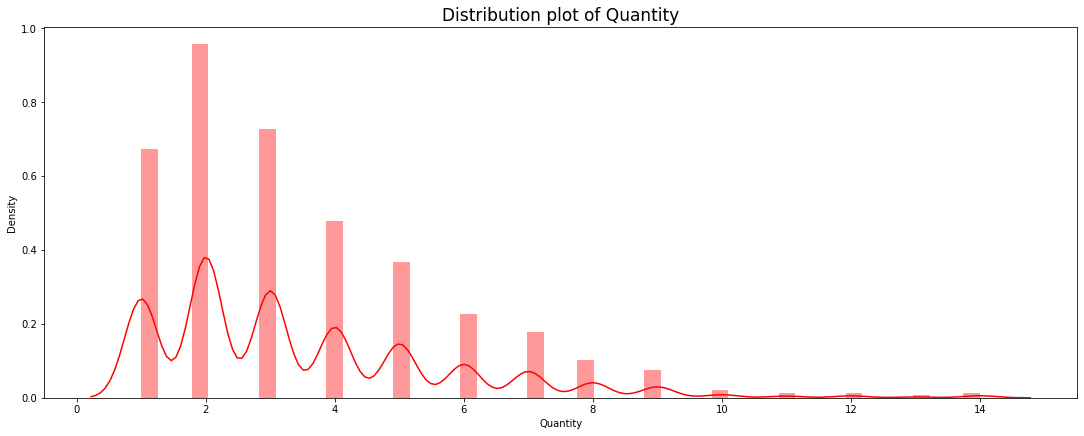

In [ ]:
#Distribution plot of Quantity
plt.figure(figsize=(15,6))
sns.distplot(data['Quantity'],color='r')
plt.title('Distribution plot of Quantity',fontsize=17)
plt.xlabel('Quantity')
plt.tight_layout(pad=0.5)

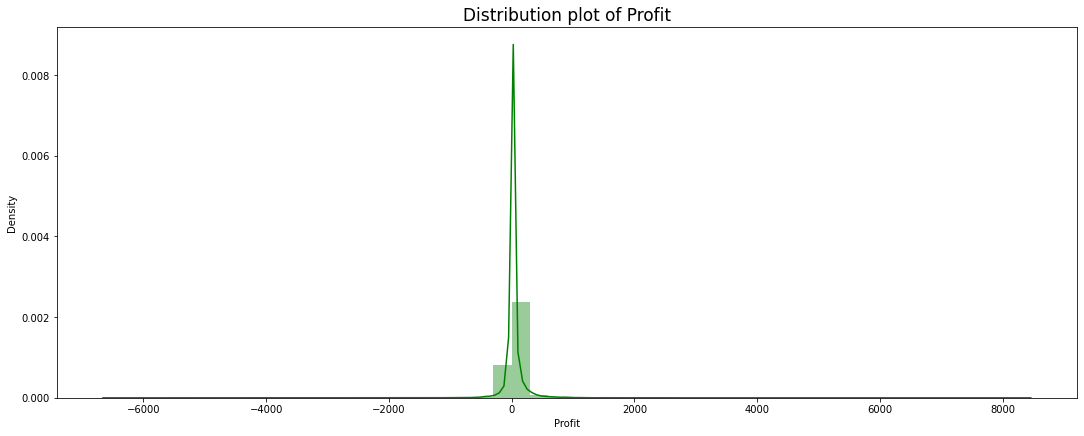

In [ ]:
#Distribution Plot of Profit
plt.figure(figsize=(15,6))
sns.distplot(data['Profit'],color='g')
plt.title('Distribution plot of Profit',fontsize=17)
plt.xlabel('Profit')
plt.tight_layout(pad=0.5)

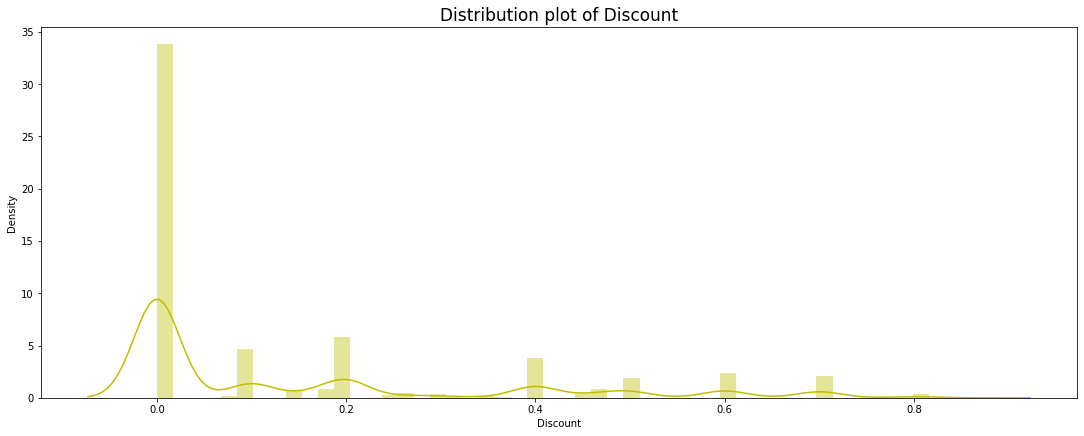

In [ ]:
#Distribution PLot of Discount
plt.figure(figsize=(15,6))
sns.distplot(data['Discount'],color='y')
plt.title('Distribution plot of Discount',fontsize=17)
plt.xlabel('Discount')
plt.tight_layout(pad=0.5)

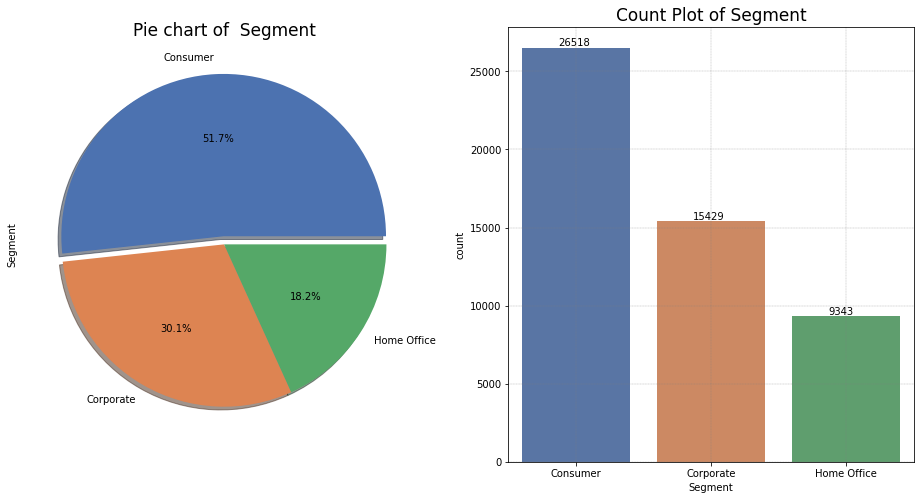

In [ ]:
#Count and Pie Chart of Segment distribution
seg=data['Segment'].value_counts()
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
seg.plot.pie(autopct='%1.1f%%',colors=sns.color_palette('deep'),shadow=True,explode=(0.05,0,0))
plt.title('Pie chart of  Segment',fontsize=17)

plt.subplot(1,2,2)
segx=sns.countplot(palette='deep',x='Segment',data=data)
for i in segx.patches:
    segx.annotate(str(i.get_height()),(i.get_x()+i.get_width()/3,i.get_height()*1.005))
plt.title('Count Plot of Segment',fontsize=17)
plt.grid(color='grey',linestyle='--',linewidth=0.3)


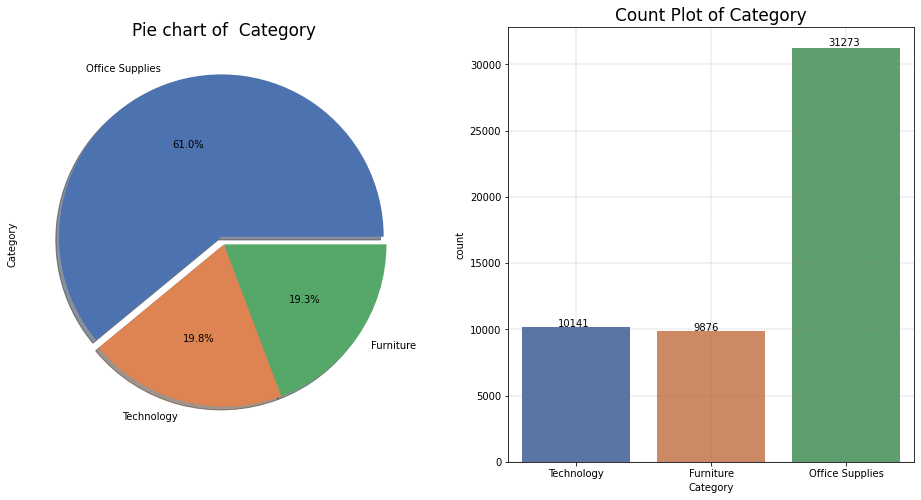

In [ ]:
#Count and Pie Chart of Category 
cat=data['Category'].value_counts()
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
cat.plot.pie(autopct='%1.1f%%',colors=sns.color_palette('deep'),shadow=True,explode=(0.05,0,0))
plt.title('Pie chart of  Category',fontsize=17)

plt.subplot(1,2,2)
cx=sns.countplot(palette='deep',x='Category',data=data)
for i in cx.patches:
    cx.annotate(str(i.get_height()),(i.get_x()+i.get_width()/3,i.get_height()*1.005))
plt.title('Count Plot of Category',fontsize=17)
plt.grid(color='grey',linestyle='--',linewidth=0.3)

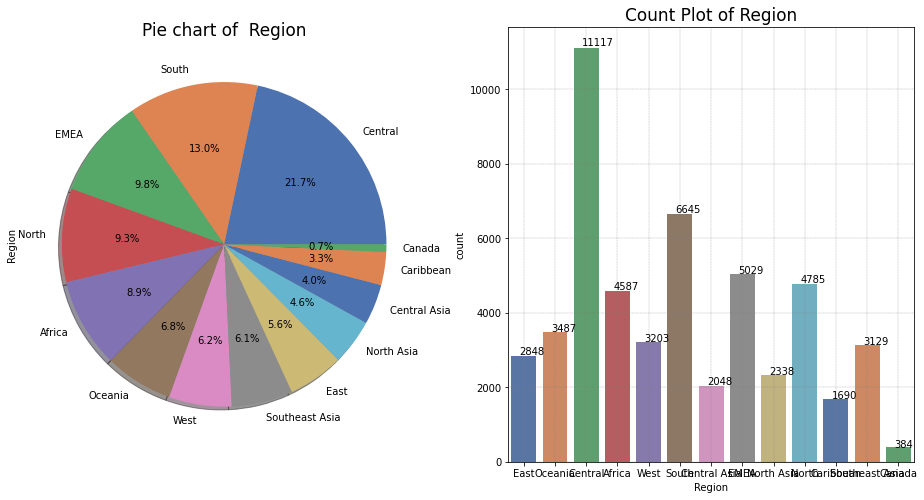

In [ ]:
#Pie and count plot of Region
Reg=data['Region'].value_counts()
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
Reg.plot.pie(autopct='%1.1f%%',colors=sns.color_palette('deep'),shadow=True)
plt.title('Pie chart of  Region',fontsize=17)

plt.subplot(1,2,2)
Regx=sns.countplot(palette='deep',x='Region',data=data)
for i in Regx.patches:
    Regx.annotate(str(i.get_height()),(i.get_x()+i.get_width()/3,i.get_height()*1.005))
plt.title('Count Plot of Region',fontsize=17)
plt.grid(color='grey',linestyle='--',linewidth=0.3)

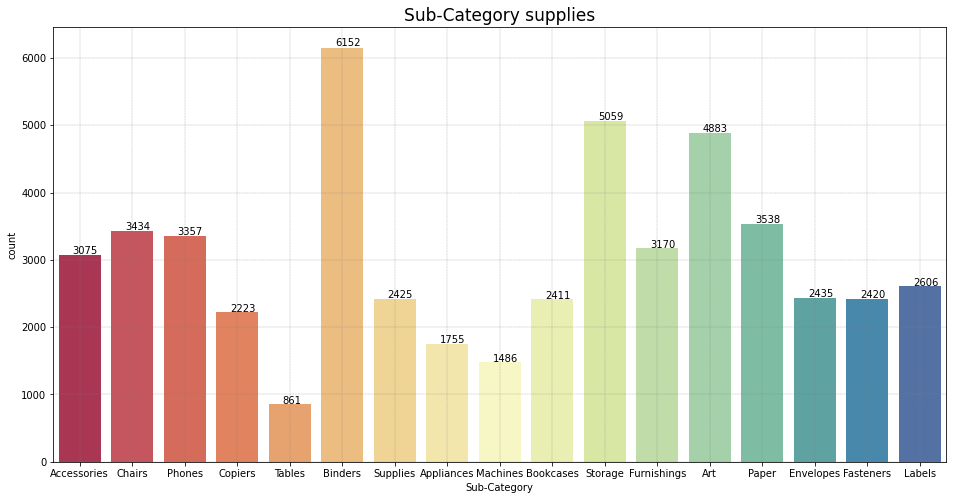

In [ ]:
#Count plot of Sub-Category
plt.figure(figsize=(16,8))
subx=sns.countplot('Sub-Category',data=data,palette='Spectral')
for i in subx.patches:
    subx.annotate(str(i.get_height()),(i.get_x()+i.get_width()/3,i.get_height()*1.005))
plt.title('Sub-Category supplies',fontsize=17)
plt.grid(color='grey',linestyle='--',linewidth=0.3)

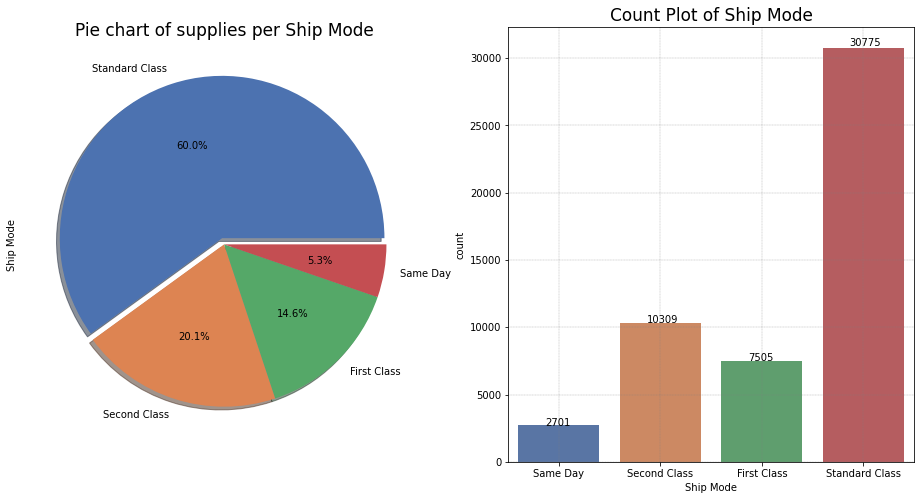

In [ ]:
#Count plot and Pie chart of Ship Mode
ship=data['Ship Mode'].value_counts()
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
ship.plot.pie(figsize=(16,8),autopct='%1.1f%%',colors=sns.color_palette('deep'),shadow=True,explode=(0.04,0,0,0))
plt.title('Pie chart of supplies per Ship Mode',fontsize=17)

plt.subplot(1,2,2)
sx=sns.countplot(palette='deep',x='Ship Mode',data=data)
for i in sx.patches:
    sx.annotate(str(i.get_height()),(i.get_x()+i.get_width()/3,i.get_height()*1.005))
plt.title('Count Plot of Ship Mode',fontsize=17)
plt.grid(color='grey',linestyle='--',linewidth=0.3)

Text(0.5, 1.0, 'Box plot of Shipping Cost')

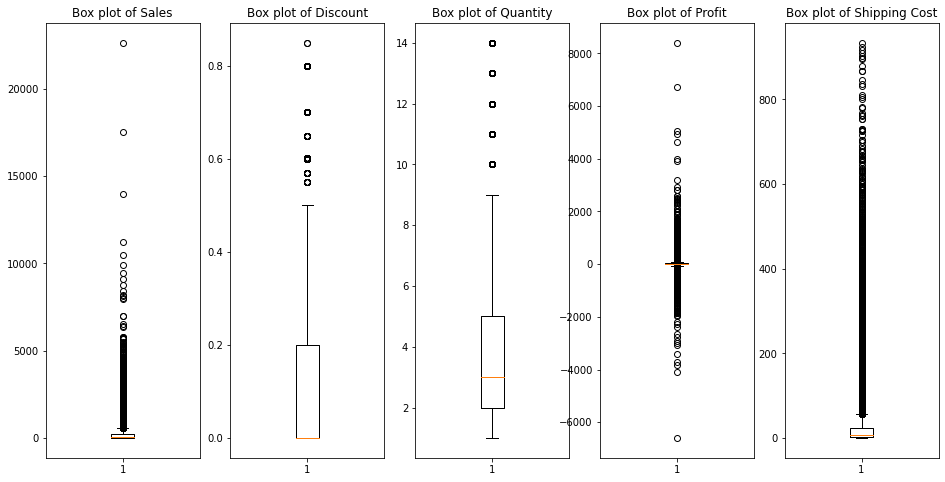

In [ ]:
#Box plots of Numerical Variables
plt.figure(figsize=(16,8))

plt.subplot(1,5,1)
plt.boxplot(data['Sales'])
plt.title('Box plot of Sales')

plt.subplot(1,5,2)
plt.boxplot(data['Discount'])
plt.title('Box plot of Discount')

plt.subplot(1,5,3)
plt.boxplot(data['Quantity'])
plt.title('Box plot of Quantity')

plt.subplot(1,5,4)
plt.boxplot(data['Profit'])
plt.title('Box plot of Profit')

plt.subplot(1,5,5)
plt.boxplot(data['Shipping Cost'])
plt.title('Box plot of Shipping Cost')

>Bivariate Analysis

Text(0.5, 0, 'Discount')

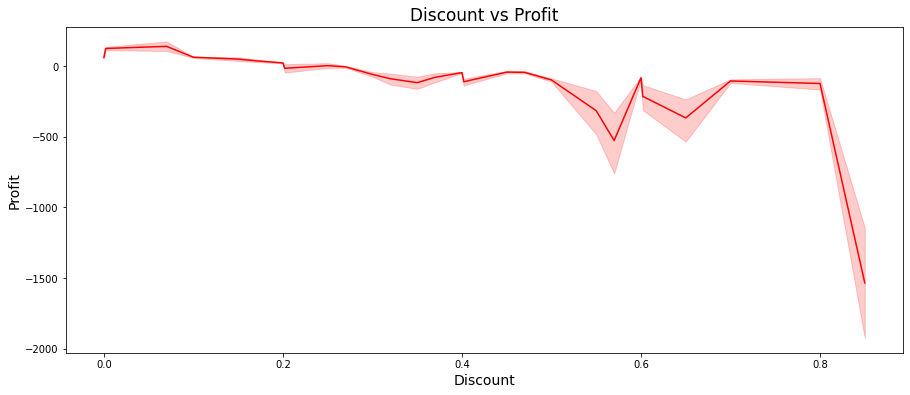

In [ ]:
#Line plot of Discount vs Profit
plt.figure(figsize=(15,6))
sns.lineplot(x='Discount',y='Profit',color='r',data=data)
plt.title('Discount vs Profit',fontsize=17)
plt.ylabel('Profit',fontsize=14)
plt.xlabel('Discount',fontsize=14)

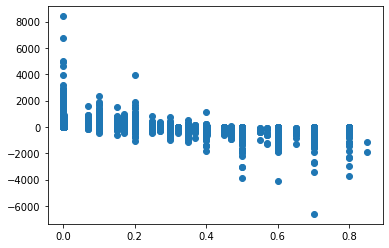

In [ ]:
plt.scatter(data['Discount'],data['Profit'])

Text(0.5, 0, 'Quantity')

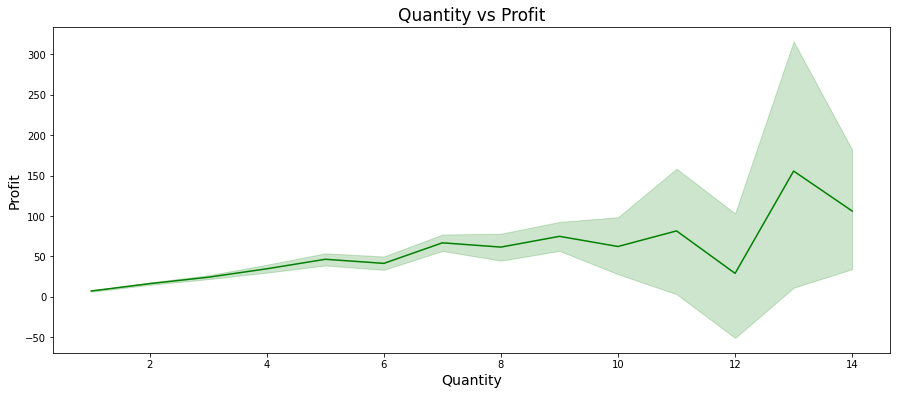

In [ ]:
#Line plot of Quantity vs Profit
plt.figure(figsize=(15,6))
sns.lineplot(x='Quantity',y='Profit',color='g',data=data)
plt.title('Quantity vs Profit',fontsize=17)
plt.ylabel('Profit',fontsize=14)
plt.xlabel('Quantity',fontsize=14)

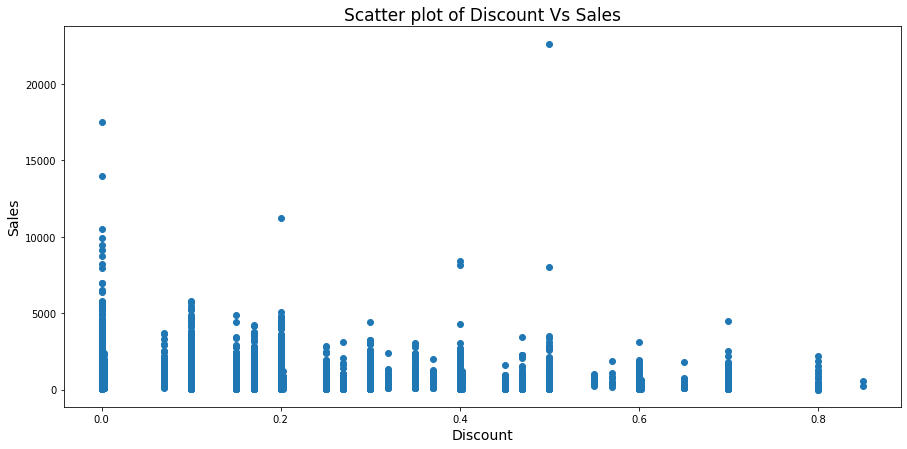

In [ ]:
#Scatter plot of Discount vs Sales
plt.figure(figsize = (15 , 7))
plt.scatter(data['Discount'] , data['Sales'])
plt.xlabel('Discount',fontsize=14)
plt.ylabel('Sales',fontsize=14)
plt.title('Scatter plot of Discount Vs Sales',fontsize=17)
plt.show()

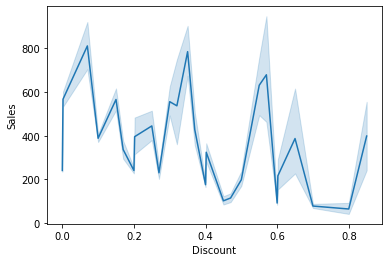

In [ ]:
sns.lineplot(x='Discount',y='Sales',data=data)

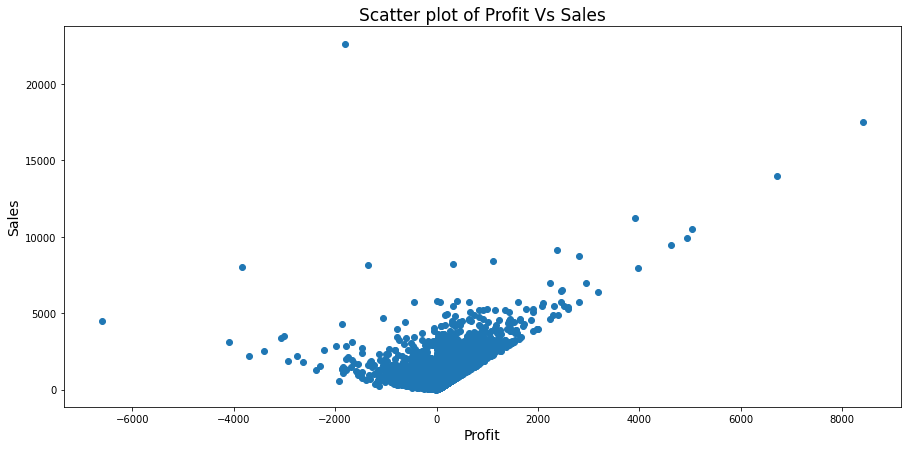

In [ ]:
#Scatter plot of Profit vs Sales
plt.figure(figsize = (15 , 7))
plt.scatter(data['Profit'] , data['Sales'])
plt.xlabel('Profit',fontsize=14)
plt.ylabel('Sales',fontsize=14)
plt.title('Scatter plot of Profit Vs Sales',fontsize=17)
plt.show()

Text(0, 0.5, 'Sales')

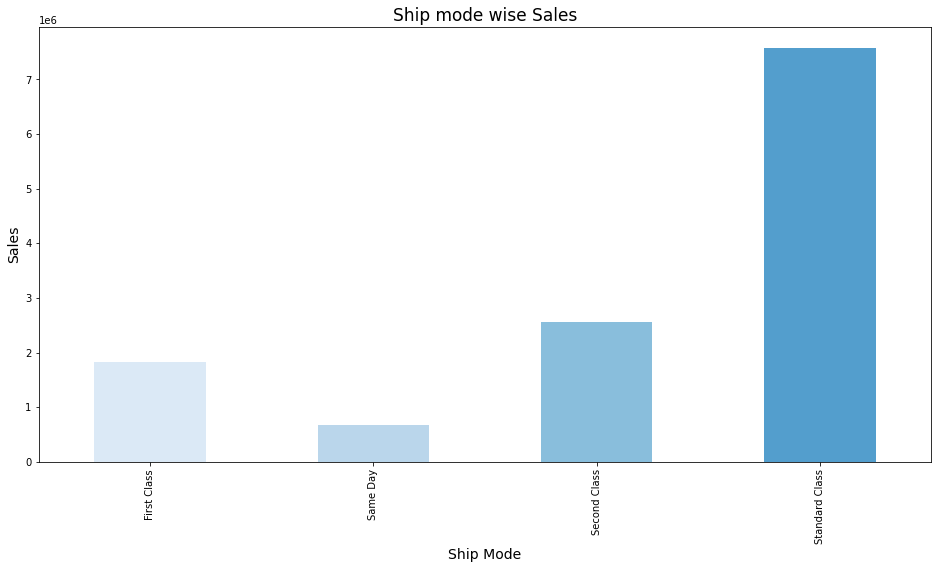

In [ ]:
#ship mode wise  total sale
plt.figure(figsize=(16,8))
SS=data.groupby('Ship Mode')['Sales'].sum()
SS.plot.bar(color=sns.color_palette('Blues'))
plt.title('Ship mode wise Sales',fontsize=17)
plt.xlabel('Ship Mode',fontsize=14)
plt.ylabel('Sales',fontsize=14)

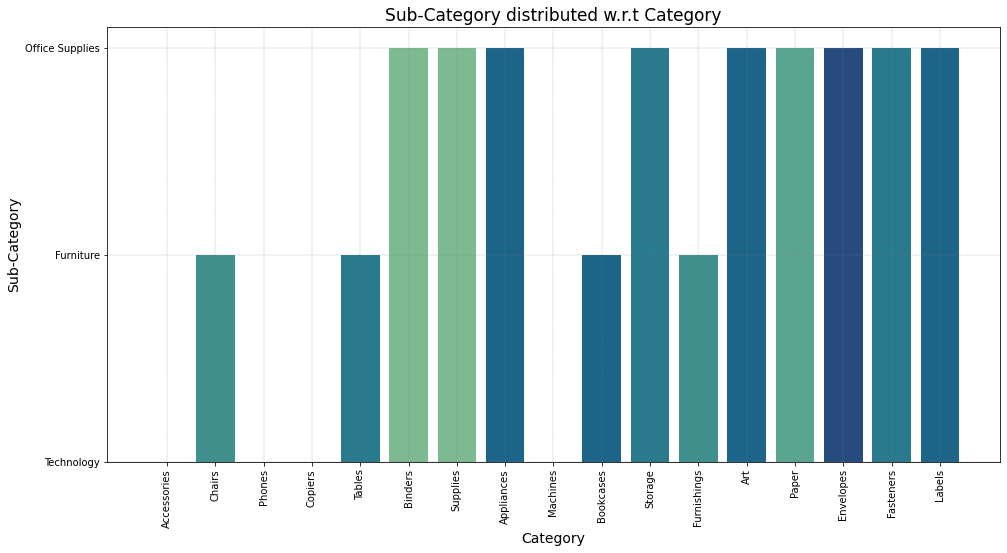

In [ ]:
#sub category distributed w.r.t category
plt.figure(figsize=(16,8))
plt.bar('Sub-Category','Category',data=data,color=sns.color_palette('crest'))
plt.title('Sub-Category distributed w.r.t Category',fontsize=17)
plt.xlabel('Category',fontsize=14)
plt.xticks(rotation=90)
plt.ylabel('Sub-Category',fontsize=14)
plt.grid(color='grey',linestyle='--',linewidth=0.3)

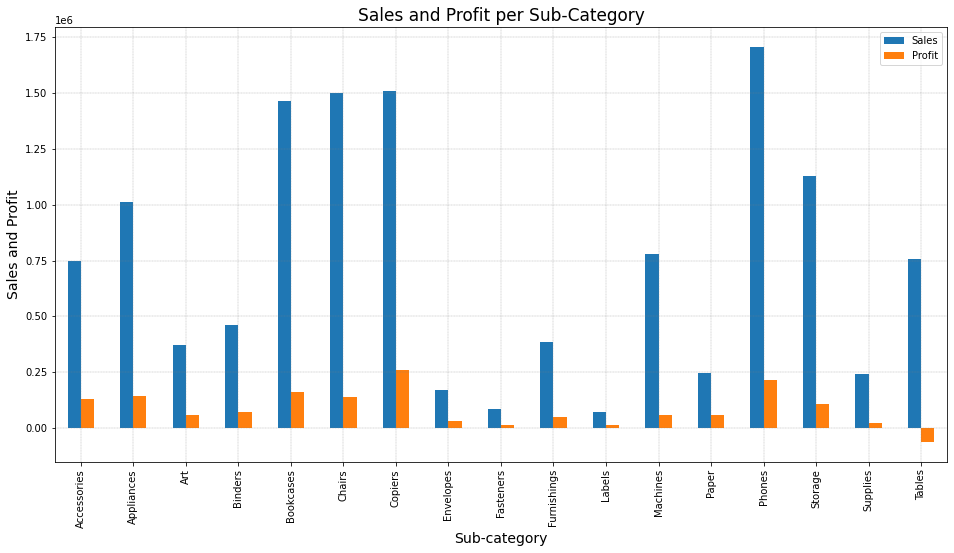

In [ ]:
#sales and profit per sub-category
sp=data.groupby('Sub-Category')[['Sales','Profit']].sum()
sp.plot.bar(figsize=(16,8))
plt.title('Sales and Profit per Sub-Category',fontsize=17)
plt.xlabel('Sub-category',fontsize=14)
plt.ylabel('Sales and Profit',fontsize=14)
plt.grid(color='grey',linestyle='--',linewidth=0.3)

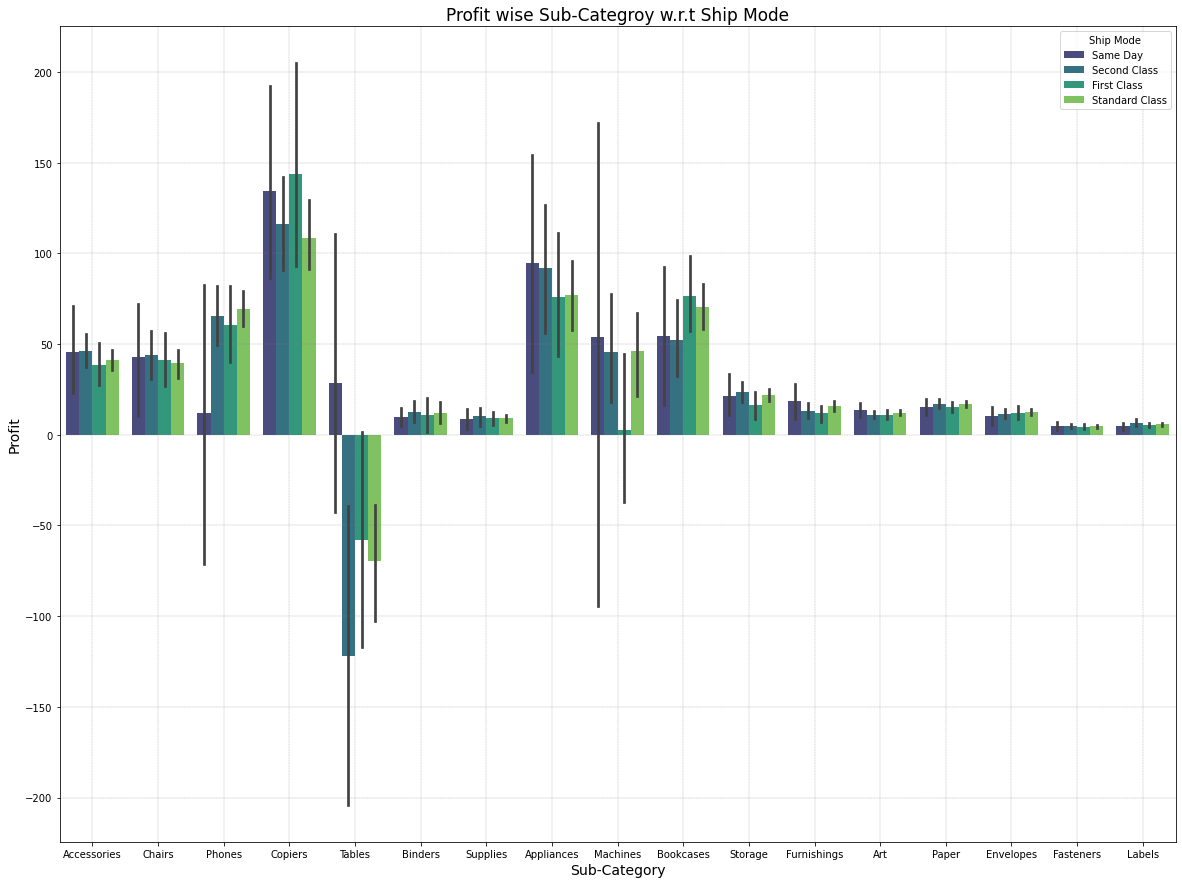

In [ ]:
#Profit Wise Sub-Category w.r.t Ship Mode
plt.figure(figsize=(20,15))
sns.barplot(x='Sub-Category',y='Profit',hue='Ship Mode',data=data,palette='viridis')
plt.title('Profit wise Sub-Categroy w.r.t Ship Mode',fontsize=17)
plt.xlabel('Sub-Category',fontsize=14)
plt.ylabel('Profit',fontsize=14)
plt.grid(color='grey',linestyle='--',linewidth=0.3)

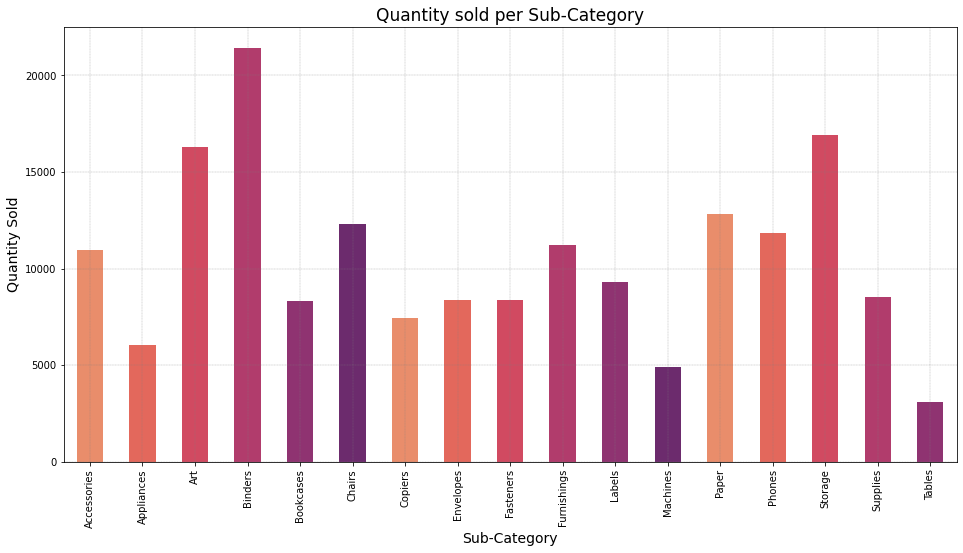

In [ ]:
#Quantity sold per sub-category
QS=data.groupby('Sub-Category')['Quantity'].sum()
QS.plot.bar(figsize=(16,8),color=sns.color_palette('flare'))
plt.title('Quantity sold per Sub-Category',fontsize=17)
plt.xlabel('Sub-Category',fontsize=14)
plt.ylabel('Quantity Sold',fontsize=14)
plt.grid(color='grey',linestyle='--',linewidth=0.3)

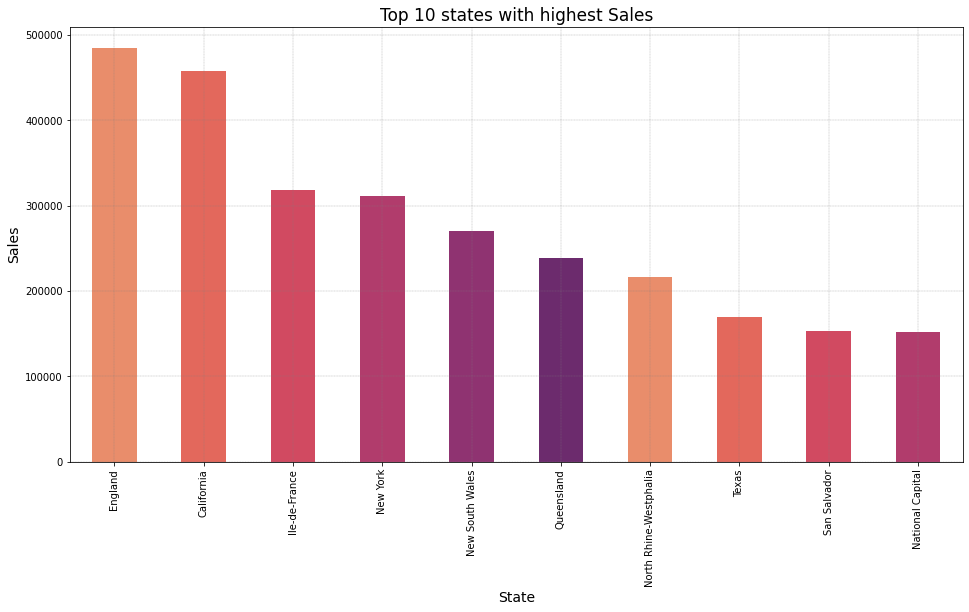

In [ ]:
#Top 10 State with highest Sales
top10_sale=data.groupby('State')['Sales'].sum().nlargest(n=10)
top10_sale.plot.bar(figsize=(16,8),color=sns.color_palette('flare'))
plt.title('Top 10 states with highest Sales',fontsize=17)
plt.xlabel('State',fontsize=14)
plt.ylabel('Sales',fontsize=14)
plt.grid(color='grey',linestyle='--',linewidth=0.3)

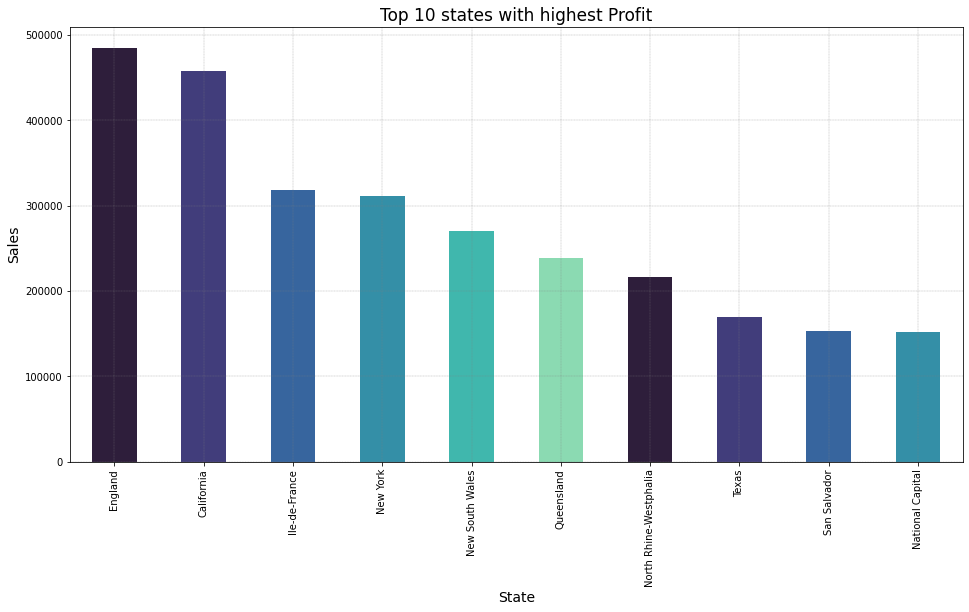

In [ ]:
#Top 10 states with highest Profit
top10_profit=data.groupby('State')['Profit'].sum().nlargest(n=10)
top10_sale.plot.bar(figsize=(16,8),color=sns.color_palette('mako'))
plt.title('Top 10 states with highest Profit',fontsize=17)
plt.xlabel('State',fontsize=14)
plt.ylabel('Sales',fontsize=14)
plt.grid(color='grey',linestyle='--',linewidth=0.3)

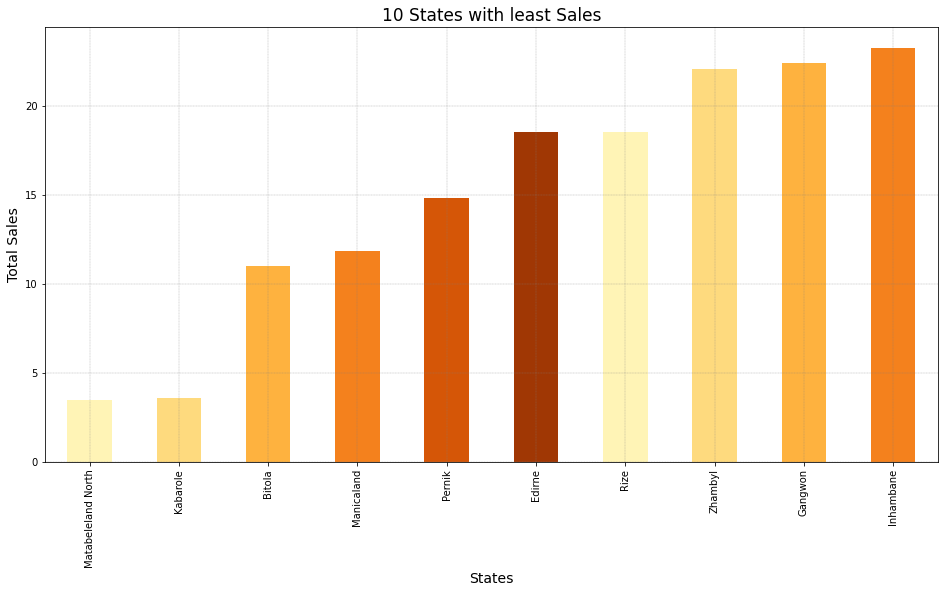

In [ ]:
#states with least sales
least10_sales=data.groupby('State')['Sales'].sum().nsmallest(n=10)
least10_sales.plot.bar(figsize=(16,8),color=sns.color_palette('YlOrBr'))
plt.title('10 States with least Sales',fontsize=17)
plt.xlabel('States',fontsize=14)
plt.ylabel('Total Sales',fontsize=14)
plt.grid(color='grey',linestyle='--',linewidth=0.3)

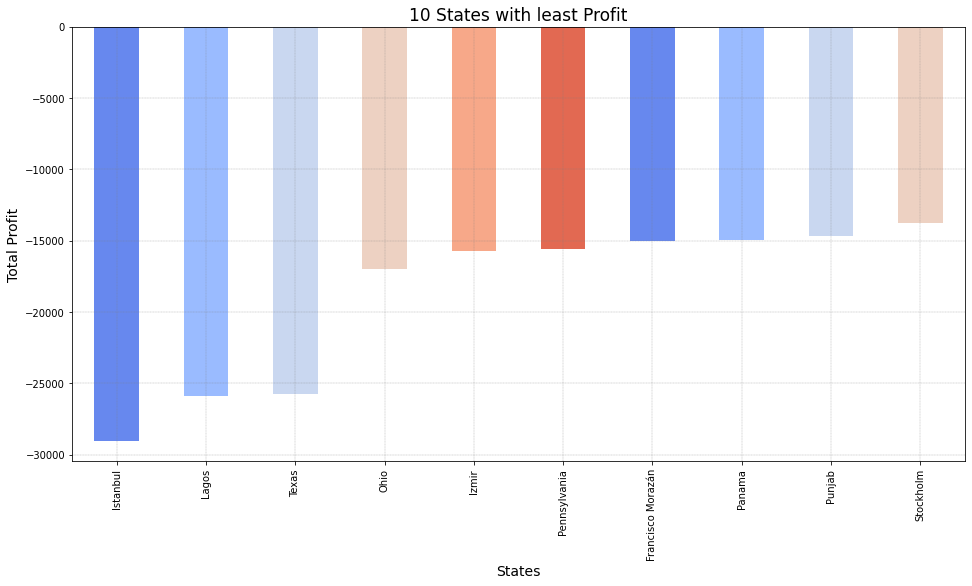

In [ ]:
#states with least sales
least10_sales=data.groupby('State')['Profit'].sum().nsmallest(n=10)
least10_sales.plot.bar(figsize=(16,8),color=sns.color_palette('coolwarm'))
plt.title('10 States with least Profit',fontsize=17)
plt.xlabel('States',fontsize=14)
plt.ylabel('Total Profit',fontsize=14)
plt.grid(color='grey',linestyle='--',linewidth=0.3)

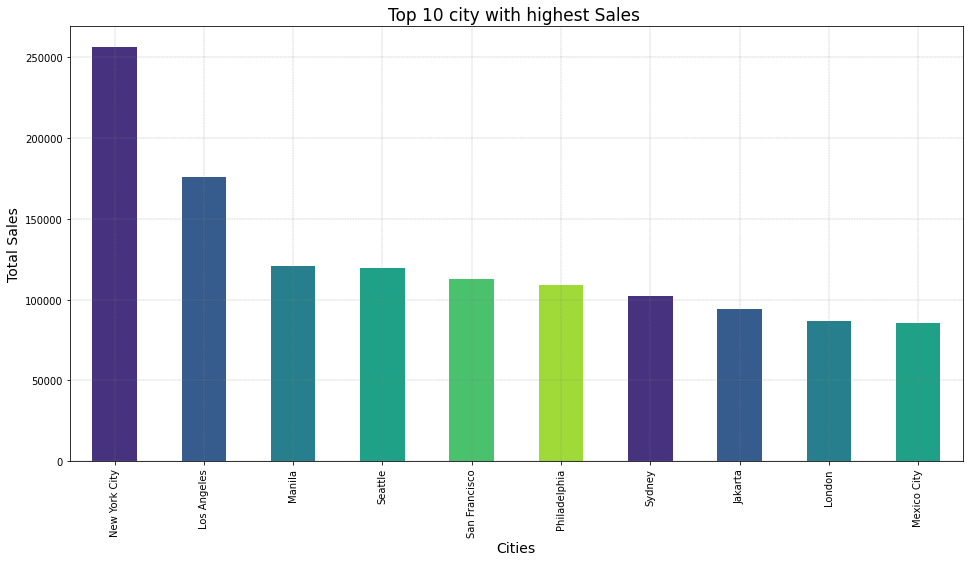

In [ ]:
#Top 10 city with highest sales
top10_CS=data.groupby('City')['Sales'].sum().nlargest(n=10)
top10_CS.plot.bar(figsize=(16,8),color=sns.color_palette('viridis'))
plt.title('Top 10 city with highest Sales ',fontsize=17)
plt.xlabel('Cities',fontsize=14)
plt.ylabel('Total Sales',fontsize=14)
plt.grid(color='grey',linestyle='--',linewidth=0.3)

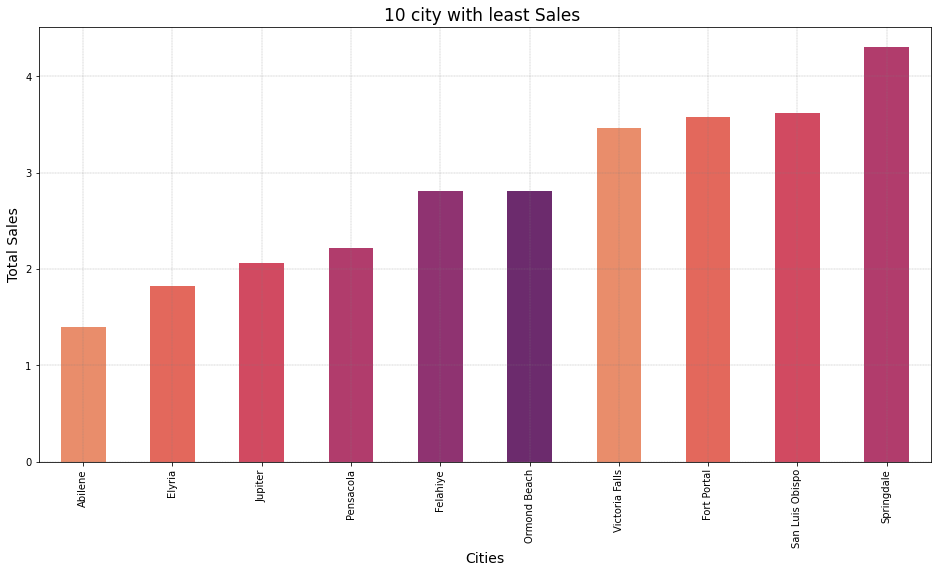

In [ ]:
#States with least Sales
least10_CS=data.groupby('City')['Sales'].sum().nsmallest(n=10)
least10_CS.plot.bar(figsize=(16,8),color=sns.color_palette('flare'))
plt.title('10 city with least Sales ',fontsize=17)
plt.xlabel('Cities',fontsize=14)
plt.ylabel('Total Sales',fontsize=14)
plt.grid(color='grey',linestyle='--',linewidth=0.3)

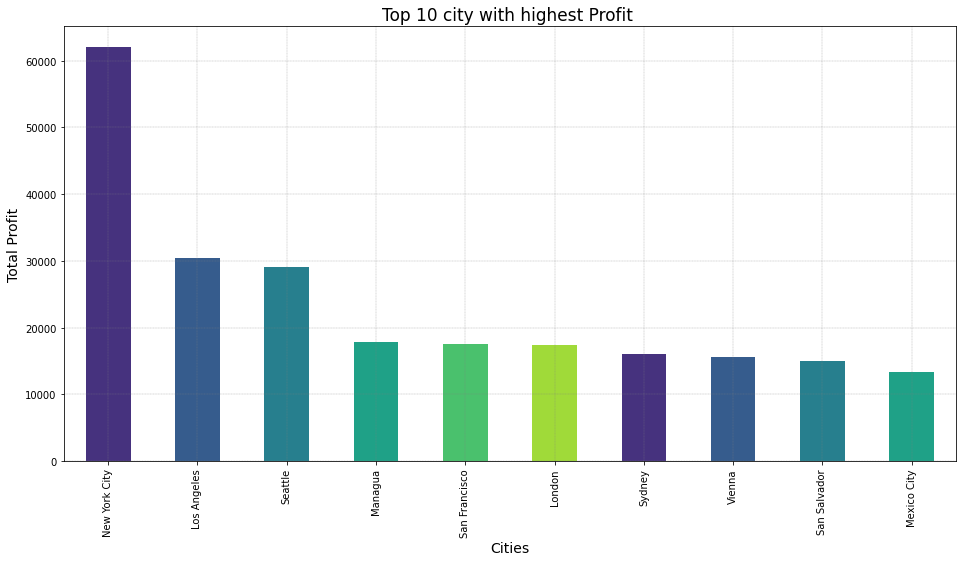

In [ ]:
#Top 10 city with highest Profit
top10_CP=data.groupby('City')['Profit'].sum().nlargest(n=10)
top10_CP.plot.bar(figsize=(16,8),color=sns.color_palette('viridis'))
plt.title('Top 10 city with highest Profit ',fontsize=17)
plt.xlabel('Cities',fontsize=14)
plt.ylabel('Total Profit',fontsize=14)
plt.grid(color='grey',linestyle='--',linewidth=0.3)

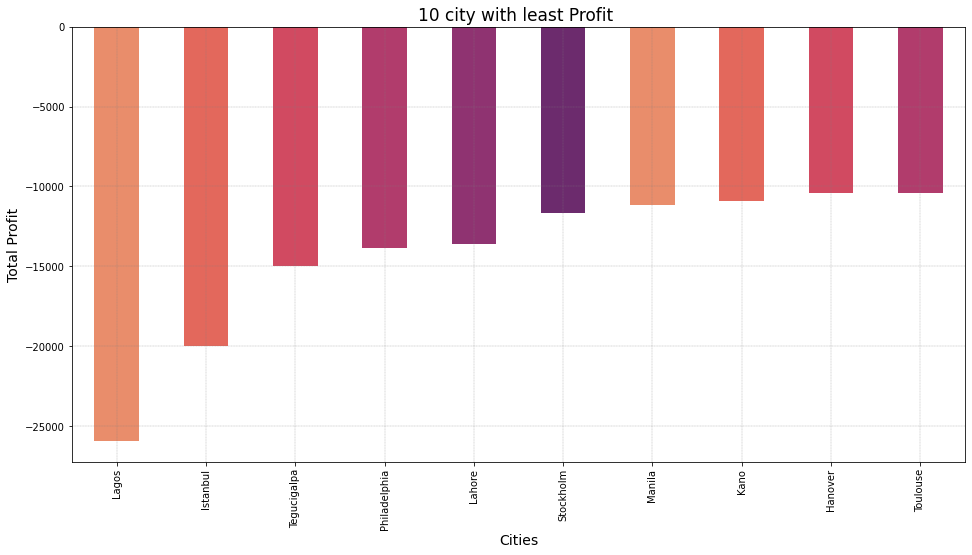

In [ ]:
#City with least Profit
least10_CP=data.groupby('City')['Profit'].sum().nsmallest(n=10)
least10_CP.plot.bar(figsize=(16,8),color=sns.color_palette('flare'))
plt.title('10 city with least Profit ',fontsize=17)
plt.xlabel('Cities',fontsize=14)
plt.ylabel('Total Profit',fontsize=14)
plt.grid(color='grey',linestyle='--',linewidth=0.3)

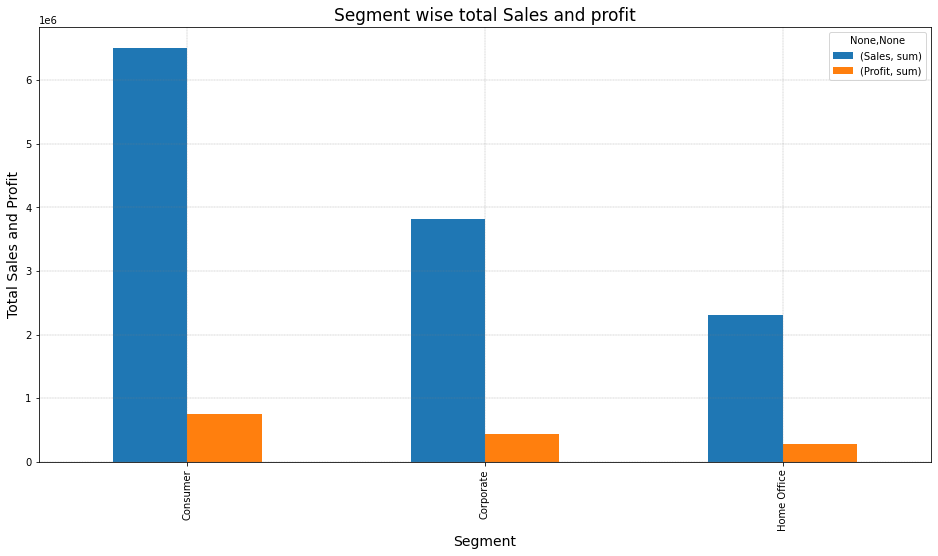

In [ ]:
#Segment Wise Total Sales and Profit
SSP=data.groupby('Segment')['Sales','Profit'].agg(['sum'])
SSP.plot.bar(figsize=(16,8))
plt.title('Segment wise total Sales and profit',fontsize=17)
plt.xlabel('Segment',fontsize=14)
plt.ylabel('Total Sales and Profit',fontsize=14)
plt.grid(color='grey',linestyle='--',linewidth=0.3)

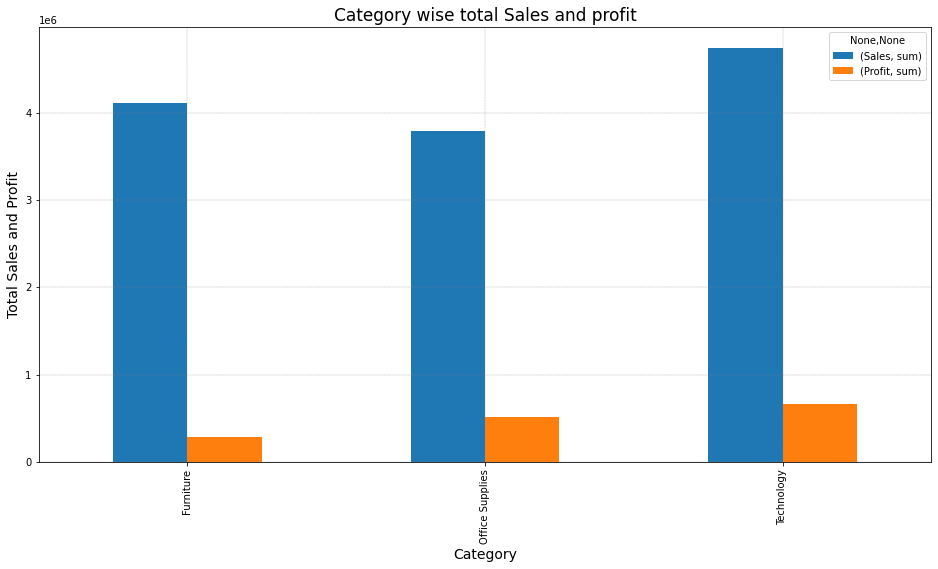

In [ ]:
#Category Wise total Sales and Profit
CSP=data.groupby('Category')['Sales','Profit'].agg(['sum'])
CSP.plot.bar(figsize=(16,8))
plt.title('Category wise total Sales and profit',fontsize=17)
plt.xlabel('Category',fontsize=14)
plt.ylabel('Total Sales and Profit',fontsize=14)
plt.grid(color='grey',linestyle='--',linewidth=0.3)

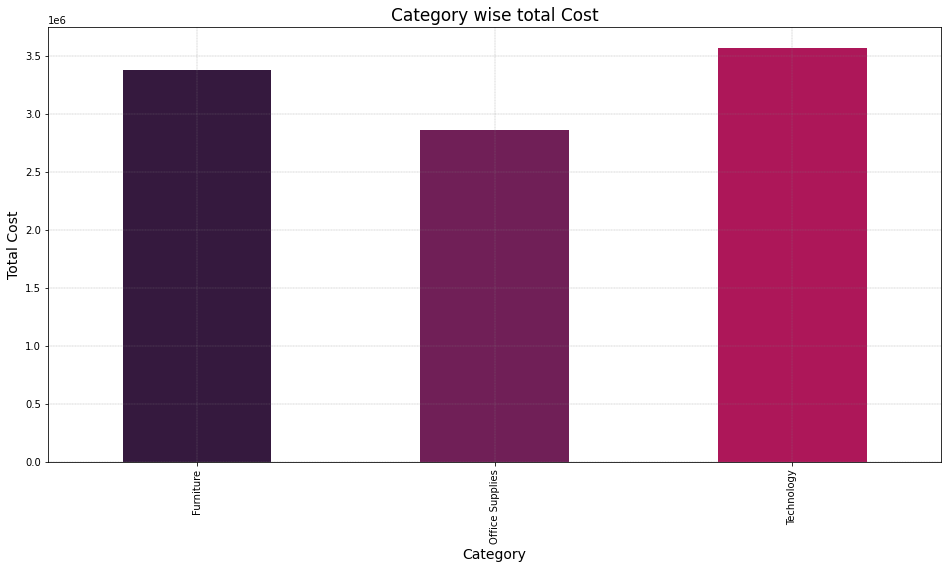

In [ ]:
#cost of goods
data['Cost']=data['Sales']-(data['Profit']+data['Shipping Cost'])
#Total Cost per Category
Sc=data.groupby('Category')['Cost'].sum()
Sc.plot.bar(figsize=(16,8),color=sns.color_palette('rocket'))
plt.title('Category wise total Cost',fontsize=17)
plt.xlabel('Category',fontsize=14)
plt.ylabel('Total Cost',fontsize=14)
plt.grid(color='grey',linestyle='--',linewidth=0.3)

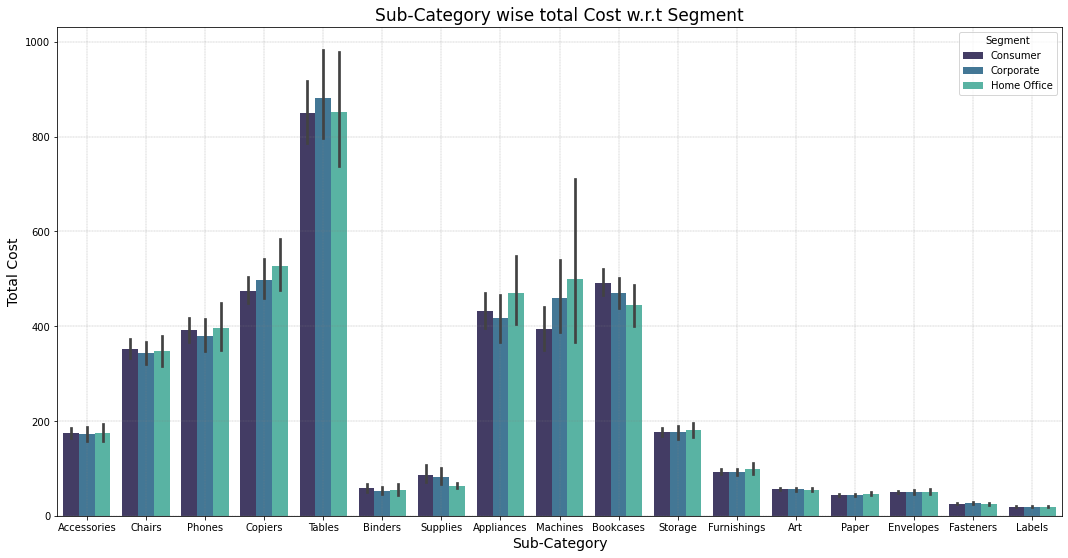

In [ ]:
plt.figure(figsize=(18,9))
sns.barplot(x='Sub-Category',y='Cost',hue='Segment',data=data,palette='mako')
plt.title('Sub-Category wise total Cost w.r.t Segment',fontsize=17)
plt.xlabel('Sub-Category',fontsize=14)
plt.ylabel('Total Cost',fontsize=14)
plt.grid(color='grey',linestyle='--',linewidth=0.3)

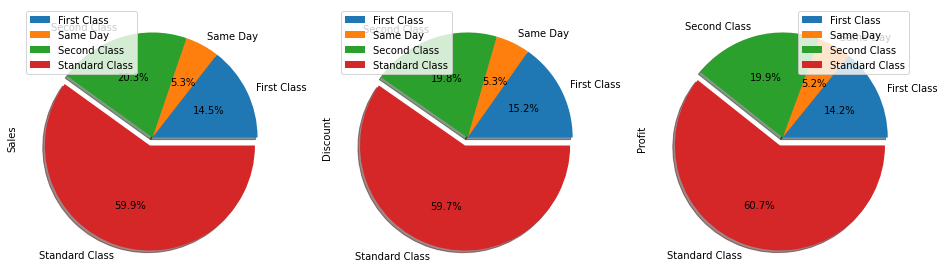

In [ ]:
#Pie plot of total sum, Profit and Discount per Ship Mode
SSDP=data.groupby('Ship Mode')['Sales','Discount','Profit'].sum()
SSDP.plot.pie(autopct='%1.1f%%',label=SSDP.index,figsize=(16,8),subplots=True,shadow=True,explode=(0,0,0,0.08))
plt.legend(loc='upper right')

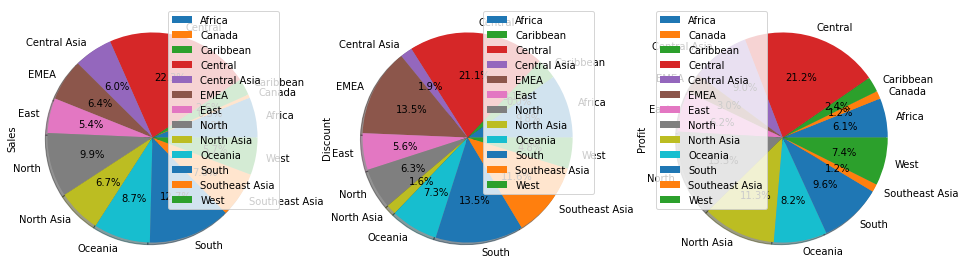

In [ ]:
##Pie plot of total sum, Profit and Discount per Region
RSDP=data.groupby('Region')['Sales','Discount','Profit'].sum()
RSDP.plot.pie(autopct='%1.1f%%',label=SSDP.index,figsize=(16,8),subplots=True,shadow=True)
plt.legend(loc='bottom left')

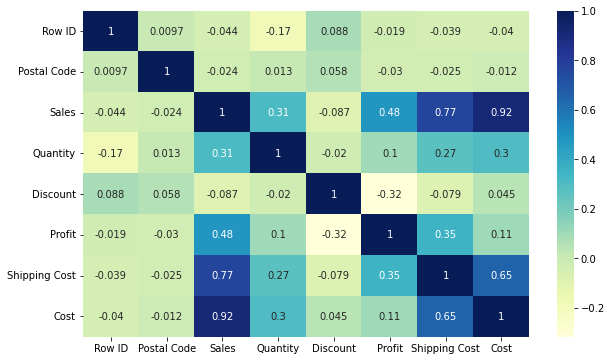

In [ ]:
#Heatmap showing Correlation among non-categorical variable
plt.figure(figsize= (10,6))
sns.heatmap(data.corr(), cmap="YlGnBu", annot= True)
plt.show()

<Figure size 1152x576 with 0 Axes>

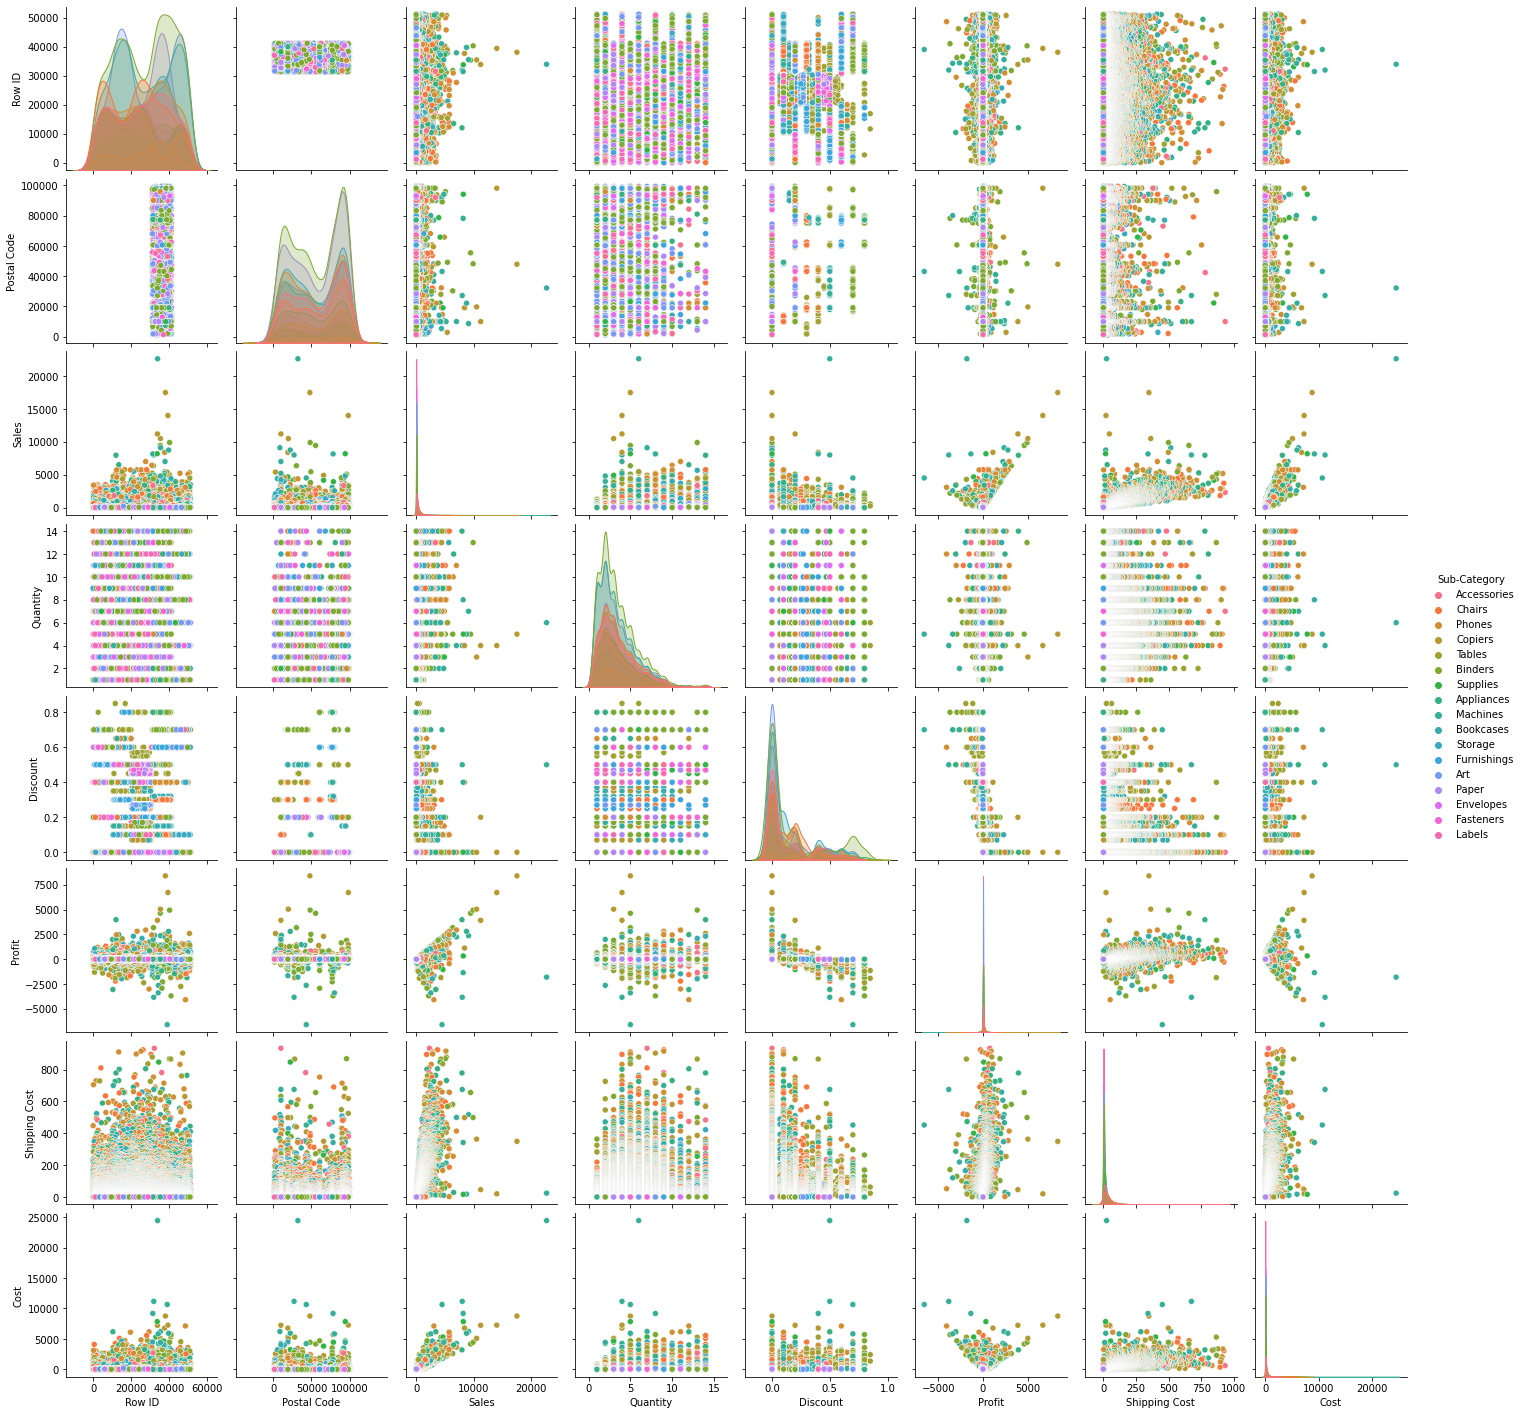

In [ ]:
#Pair plot of the data with hue as Sub-Category
plt.figure(figsize=(16,8))
sns.pairplot(data,hue='Sub-Category')

#**PRE**-**PROCESSING**

In [ ]:
#splitting the dataset
x=data.drop(['Order Priority'],axis=1)
y=data['Order Priority']

>Feature Engineering

In [ ]:
#feature engineering on 'Order Date' and 'Ship Date'
from numpy import datetime64
x['Order Date']=x['Order Date'].astype(datetime64)
x['Ship Date']=x['Ship Date'].astype(datetime64)
x['ordered day of week']=x['Order Date'].dt.weekday
x['ordered month']=x['Order Date'].dt.month
x['ordered week of year']=x['Order Date'].dt.weekofyear
x['shipped day of week']=x['Ship Date'].dt.weekday
x['shipped month']=x['Ship Date'].dt.month
x['shipped week of year']=x['Ship Date'].dt.weekofyear
x.head(4)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Discount,Profit,Shipping Cost,Cost,ordered day of week,ordered month,ordered week of year,shipped day of week,shipped month,shipped week of year
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,0.0,762.1845,933.57,613.8955,1,7,31,1,7,31
1,26341,IN-2013-77878,2013-05-02,2013-07-02,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,0.1,-288.7650,923.63,3074.5300,3,5,18,1,7,27
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,0.1,919.9710,915.49,3339.7100,3,10,42,4,10,42
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,0.1,-96.5400,910.16,2078.8900,0,1,5,2,1,5


In [ ]:
x.dtypes

Row ID                           int64
Order ID                        object
Order Date              datetime64[ns]
Ship Date               datetime64[ns]
Ship Mode                       object
Customer ID                     object
Customer Name                   object
Segment                         object
City                            object
State                           object
Country                         object
Postal Code                    float64
Market                          object
Region                          object
Product ID                      object
Category                        object
Sub-Category                    object
Product Name                    object
Sales                          float64
Quantity                         int64
Discount                       float64
Profit                         float64
Shipping Cost                  float64
Cost                           float64
ordered day of week              int64
ordered month            

>Outlier Handling

Text(0.5, 1.0, 'Box plot of Sales')

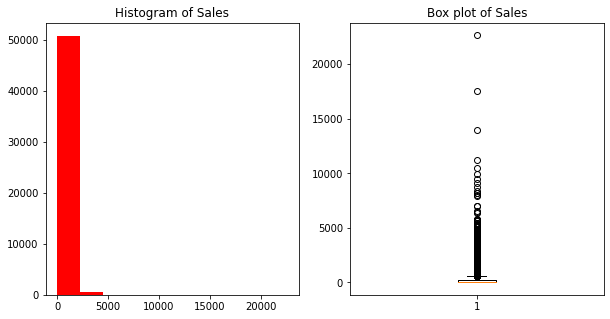

In [ ]:
#outlier handling in 'Sales'
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.hist(x['Sales'],color='red')
plt.title('Histogram of Sales')

plt.subplot(1,2,2)
plt.boxplot(x['Sales'])
plt.title('Box plot of Sales')


Text(0.5, 1.0, 'Box plot of Sales')

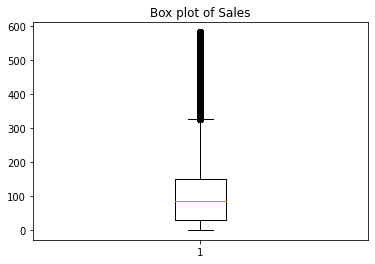

In [ ]:
#outliers are handled with median value of column as its right skewed
Q1=np.percentile(x['Sales'],25,interpolation='midpoint')
Q2=np.percentile(x['Sales'],50,interpolation='midpoint')
Q3=np.percentile(x['Sales'],75,interpolation='midpoint')
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
out_ind=x[(x['Sales']<low_lim)|(x['Sales']>up_lim)].index
x.loc[list(out_ind),'Sales']=x['Sales'].median()
plt.boxplot(x['Sales'])
plt.title('Box plot of Sales')

Text(0.5, 1.0, 'Box plot of Profit')

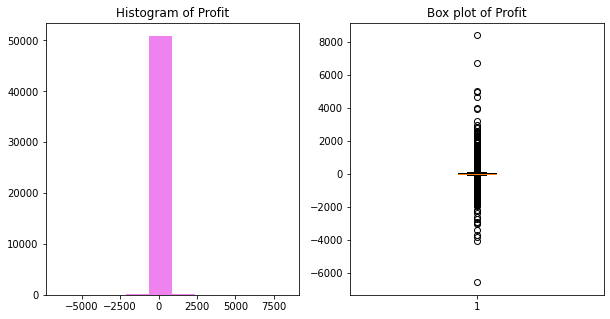

In [ ]:
#Outlier handling in profit
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.hist(x['Profit'],color='violet')
plt.title('Histogram of Profit')

plt.subplot(1,2,2)
plt.boxplot(x['Profit'])
plt.title('Box plot of Profit')

Text(0.5, 1.0, 'Box plot of Profit')

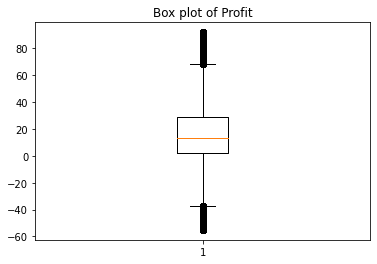

In [ ]:
#outliers are handled with mean value of column as its normally distributed
Q1=np.percentile(x['Profit'],25,interpolation='midpoint')
Q2=np.percentile(x['Profit'],50,interpolation='midpoint')
Q3=np.percentile(x['Profit'],75,interpolation='midpoint')
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
out_ind=x[(x['Profit']<low_lim)|(x['Profit']>up_lim)].index
x.loc[list(out_ind),'Profit']=x['Profit'].mean()
plt.boxplot(x['Profit'])
plt.title('Box plot of Profit')

Text(0.5, 1.0, 'Box plot of Quantity')

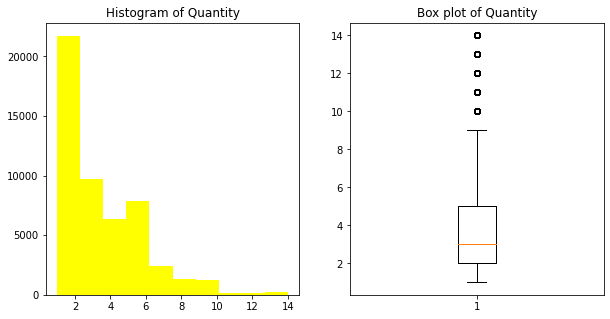

In [ ]:
#Outlier handling in Quantity
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.hist(x['Quantity'],color='yellow')
plt.title('Histogram of Quantity')

plt.subplot(1,2,2)
plt.boxplot(x['Quantity'])
plt.title('Box plot of Quantity')

Text(0.5, 1.0, 'Box plot of Quantity')

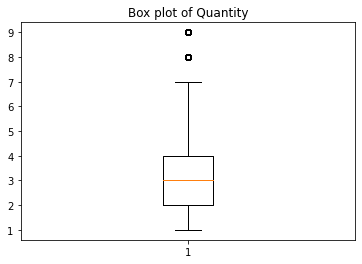

In [ ]:
#outliers are handled with median value of column as its right skewed
Q1=np.percentile(x['Quantity'],25,interpolation='midpoint')
Q2=np.percentile(x['Quantity'],50,interpolation='midpoint')
Q3=np.percentile(x['Quantity'],75,interpolation='midpoint')
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
out_ind=x[(x['Quantity']<low_lim)|(x['Quantity']>up_lim)].index
x.loc[list(out_ind),'Quantity']=x['Quantity'].median()
plt.boxplot(x['Quantity'])
plt.title('Box plot of Quantity')

Text(0.5, 1.0, 'Box plot of Discount')

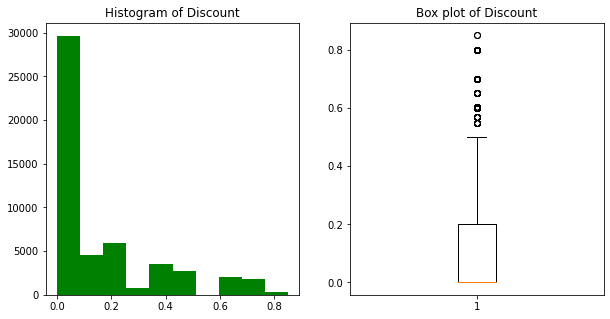

In [ ]:
#Outlier handling in Discount
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.hist(x['Discount'],color='green')
plt.title('Histogram of Discount')

plt.subplot(1,2,2)
plt.boxplot(x['Discount'])
plt.title('Box plot of Discount')

Text(0.5, 1.0, 'Box plot of Discount')

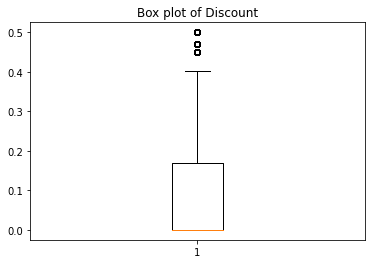

In [ ]:
#outliers are handled with median value of column as its right skewed
Q1=np.percentile(x['Discount'],25,interpolation='midpoint')
Q2=np.percentile(x['Discount'],50,interpolation='midpoint')
Q3=np.percentile(x['Discount'],75,interpolation='midpoint')
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
out_ind=x[(x['Discount']<low_lim)|(x['Discount']>up_lim)].index
x.loc[list(out_ind),'Discount']=x['Discount'].median()
plt.boxplot(x['Discount'])
plt.title('Box plot of Discount')

Text(0.5, 1.0, 'Box plot of Shipping Cost')

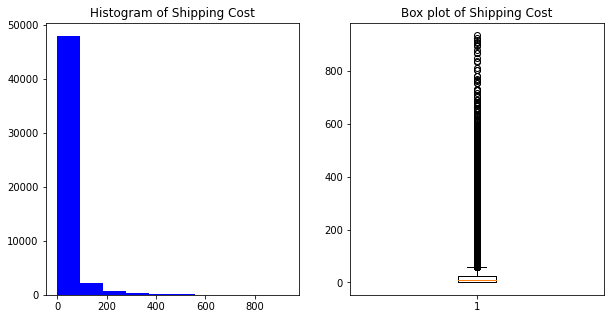

In [ ]:
#Outlier handling in Shipping Cost
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.hist(x['Shipping Cost'],color='blue')
plt.title('Histogram of Shipping Cost')

plt.subplot(1,2,2)
plt.boxplot(x['Shipping Cost'])
plt.title('Box plot of Shipping Cost')

Text(0.5, 1.0, 'Box plot of Shipping Cost')

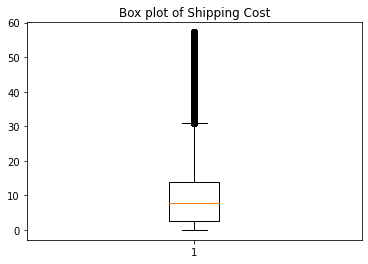

In [ ]:
#outliers are handled with median value of column as its right skewed
Q1=np.percentile(x['Shipping Cost'],25,interpolation='midpoint')
Q2=np.percentile(x['Shipping Cost'],50,interpolation='midpoint')
Q3=np.percentile(x['Shipping Cost'],75,interpolation='midpoint')
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
out_ind=x[(x['Shipping Cost']<low_lim)|(x['Shipping Cost']>up_lim)].index
x.loc[list(out_ind),'Shipping Cost']=x['Shipping Cost'].median()
plt.boxplot(x['Shipping Cost'])
plt.title('Box plot of Shipping Cost')

Text(0.5, 1.0, 'Box plot of Cost')

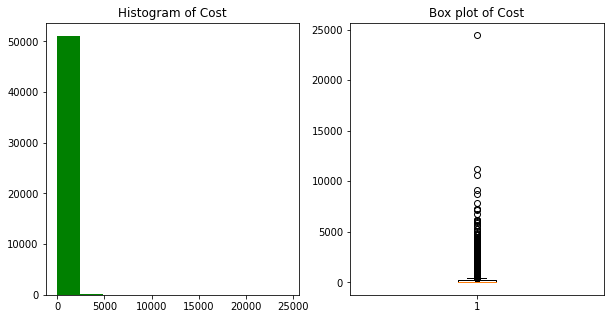

In [ ]:
#Outlier handling in Cost
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.hist(x['Cost'],color='green')
plt.title('Histogram of Cost')

plt.subplot(1,2,2)
plt.boxplot(x['Cost'])
plt.title('Box plot of Cost')


Text(0.5, 1.0, 'Box plot of Cost')

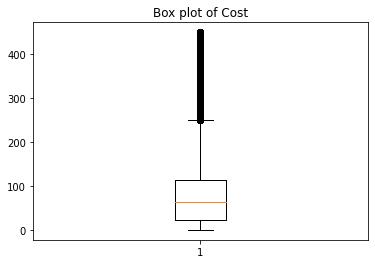

In [ ]:
#outliers are handled with median value of column as its right skewed
Q1=np.percentile(x['Cost'],25,interpolation='midpoint')
Q2=np.percentile(x['Cost'],50,interpolation='midpoint')
Q3=np.percentile(x['Cost'],75,interpolation='midpoint')
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
out_ind=x[(x['Cost']<low_lim)|(x['Cost']>up_lim)].index
x.loc[list(out_ind),'Cost']=x['Cost'].median()
plt.boxplot(x['Cost'])
plt.title('Box plot of Cost')

>Feature reduction

In [ ]:
x.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Cost', 'ordered day of week',
       'ordered month', 'ordered week of year', 'shipped day of week',
       'shipped month', 'shipped week of year'],
      dtype='object')

In [ ]:
x.isna().sum()

Row ID                      0
Order ID                    0
Order Date                  0
Ship Date                   0
Ship Mode                   0
Customer ID                 0
Customer Name               0
Segment                     0
City                        0
State                       0
Country                     0
Postal Code             41296
Market                      0
Region                      0
Product ID                  0
Category                    0
Sub-Category                0
Product Name                0
Sales                       0
Quantity                    0
Discount                    0
Profit                      0
Shipping Cost               0
Cost                        0
ordered day of week         0
ordered month               0
ordered week of year        0
shipped day of week         0
shipped month               0
shipped week of year        0
dtype: int64

In [ ]:
#about 80% of postal code are null values,hence dropping it
x.drop(['Postal Code'],axis=1,inplace=True)
x.drop(['Row ID', 'Order ID','Customer ID', 'Customer Name', 'Product ID','Order Date','Ship Date'],axis=1,inplace=True)

>Encoding

In [ ]:
x.nunique()

Ship Mode                   4
Segment                     3
City                     3636
State                    1094
Country                   147
Market                      7
Region                     13
Category                    3
Sub-Category               17
Product Name             3788
Sales                   18703
Quantity                    9
Discount                   19
Profit                  16916
Shipping Cost            5217
Cost                    32836
ordered day of week         7
ordered month              12
ordered week of year       52
shipped day of week         7
shipped month              12
shipped week of year       52
dtype: int64

In [ ]:
x['Market'].value_counts()

APAC      11002
LATAM     10294
EU        10000
US         9994
EMEA       5029
Africa     4587
Canada      384
Name: Market, dtype: int64

In [ ]:
#One Hot Encoding
x=pd.get_dummies(x,columns=['Segment','Category'])
x.head(4)

,Ship Mode,City,State,Country,Market,Region,Sub-Category,Product Name,Sales,Quantity,...,ordered week of year,shipped day of week,shipped month,shipped week of year,Segment_Consumer,Segment_Corporate,Segment_Home Office,Category_Furniture,Category_Office Supplies,Category_Technology
0,Same Day,New York City,New York,United States,US,East,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,85.053,7,...,31,1,7,31,1,0,0,0,0,1
1,Second Class,Wollongong,New South Wales,Australia,APAC,Oceania,Chairs,"Novimex Executive Leather Armchair, Black",85.053,9,...,18,1,7,27,0,1,0,1,0,0
2,First Class,Brisbane,Queensland,Australia,APAC,Oceania,Phones,"Nokia Smart Phone, with Caller ID",85.053,9,...,42,4,10,42,1,0,0,0,0,1
3,First Class,Berlin,Berlin,Germany,EU,Central,Phones,"Motorola Smart Phone, Cordless",85.053,5,...,5,2,1,5,0,0,1,0,0,1


In [ ]:
x.nunique()

Ship Mode                       4
City                         3636
State                        1094
Country                       147
Market                          7
Region                         13
Sub-Category                   17
Product Name                 3788
Sales                       18703
Quantity                        9
Discount                       19
Profit                      16916
Shipping Cost                5217
Cost                        32836
ordered day of week             7
ordered month                  12
ordered week of year           52
shipped day of week             7
shipped month                  12
shipped week of year           52
Segment_Consumer                2
Segment_Corporate               2
Segment_Home Office             2
Category_Furniture              2
Category_Office Supplies        2
Category_Technology             2
dtype: int64

In [ ]:
#Label encoding
from sklearn.preprocessing import LabelEncoder
lab_en=LabelEncoder()
x['Ship Mode']=lab_en.fit_transform(x['Ship Mode'])
x['City']=lab_en.fit_transform(x['City'])
x['State']=lab_en.fit_transform(x['State'])
x['Country']=lab_en.fit_transform(x['Country'])
x['Market']=lab_en.fit_transform(x['Market'])
x['Region']=lab_en.fit_transform(x['Region'])
x['Sub-Category']=lab_en.fit_transform(x['Sub-Category'])
x['Product Name']=lab_en.fit_transform(x['Product Name'])
x.head(4)

,Ship Mode,City,State,Country,Market,Region,Sub-Category,Product Name,Sales,Quantity,...,ordered week of year,shipped day of week,shipped month,shipped week of year,Segment_Consumer,Segment_Corporate,Segment_Home Office,Category_Furniture,Category_Office Supplies,Category_Technology
0,1,2290,703,139,6,6,0,2750,85.053,7,...,31,1,7,31,1,0,0,0,0,1
1,2,3518,702,6,0,9,5,2525,85.053,9,...,18,1,7,27,0,1,0,1,0,0
2,0,497,820,6,0,9,13,2502,85.053,9,...,42,4,10,42,1,0,0,0,0,1
3,0,375,145,47,4,3,13,2414,85.053,5,...,5,2,1,5,0,0,1,0,0,1


In [ ]:
y.value_counts()

Medium      29433
High        15501
Critical     3932
Low          2424
Name: Order Priority, dtype: int64

In [ ]:
#Label Encoding Target
lab_en=LabelEncoder()
y=lab_en.fit_transform(y)
print(y)

[0 0 3 ... 1 3 1]


>Up Sampling-SMOTE






In [ ]:
from collections import Counter
counter=Counter(y)
print(counter)

Counter({3: 29433, 1: 15501, 0: 3932, 2: 2424})


<BarContainer object of 4 artists>

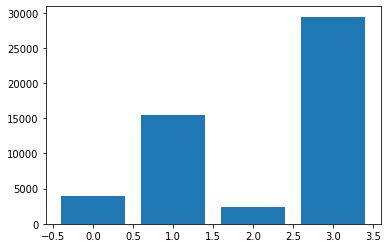

In [ ]:
plt.bar(counter.keys(),counter.values())

In [ ]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
x,y=oversample.fit_resample(x,y)
counter=Counter(y)
print(counter)

Counter({0: 29433, 3: 29433, 1: 29433, 2: 29433})


<BarContainer object of 4 artists>

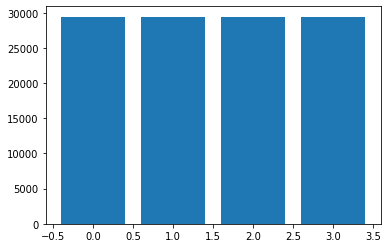

In [ ]:
plt.bar(counter.keys(),counter.values())

>Standardisation

In [ ]:
x.describe()

,Ship Mode,City,State,Country,Market,Region,Sub-Category,Product Name,Sales,Quantity,...,ordered week of year,shipped day of week,shipped month,shipped week of year,Segment_Consumer,Segment_Corporate,Segment_Home Office,Category_Furniture,Category_Office Supplies,Category_Technology
count,117732.000000,117732.000000,117732.000000,117732.000000,117732.000000,117732.000000,117732.000000,117732.000000,117732.000000,117732.000000,...,117732.000000,117732.000000,117732.000000,117732.000000,117732.000000,117732.000000,117732.000000,117732.000000,117732.000000,117732.000000
mean,1.991302,1835.500798,552.001792,79.201755,3.192267,5.824839,7.270139,1882.556960,113.948060,3.072427,...,29.013777,2.746492,6.860208,28.679110,0.375973,0.185599,0.101578,0.118991,0.526543,0.123373
std,1.199846,1001.161589,299.985466,43.438750,2.057897,3.304842,4.467844,1087.899904,118.822660,1.789292,...,13.568987,1.836071,3.092731,13.670664,0.484375,0.388785,0.302094,0.323779,0.499297,0.328867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.444000,1.000000,...,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,937.000000,297.000000,44.000000,1.000000,3.000000,3.000000,889.000000,33.480000,2.000000,...,19.000000,1.000000,4.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,1910.000000,553.000000,79.000000,4.000000,6.000000,7.000000,1871.000000,76.913543,3.000000,...,30.000000,3.000000,7.000000,29.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,3.000000,2699.000000,809.000000,123.000000,5.000000,9.000000,11.000000,2910.250000,139.801500,4.000000,...,40.000000,4.000000,9.000000,40.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,3.000000,3635.000000,1093.000000,146.000000,6.000000,12.000000,16.000000,3787.000000,581.400000,9.000000,...,52.000000,6.000000,12.000000,52.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
x.columns

Index(['Ship Mode', 'City', 'State', 'Country', 'Market', 'Region',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Cost', 'ordered day of week',
       'ordered month', 'ordered week of year', 'shipped day of week',
       'shipped month', 'shipped week of year', 'Segment_Consumer',
       'Segment_Corporate', 'Segment_Home Office', 'Category_Furniture',
       'Category_Office Supplies', 'Category_Technology'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X=scale.fit_transform(x)

In [ ]:
X=pd.DataFrame(X,columns=x.columns)
X.describe()

,Ship Mode,City,State,Country,Market,Region,Sub-Category,Product Name,Sales,Quantity,...,ordered week of year,shipped day of week,shipped month,shipped week of year,Segment_Consumer,Segment_Corporate,Segment_Home Office,Category_Furniture,Category_Office Supplies,Category_Technology
count,1.177320e+05,1.177320e+05,1.177320e+05,1.177320e+05,1.177320e+05,1.177320e+05,1.177320e+05,1.177320e+05,1.177320e+05,1.177320e+05,...,1.177320e+05,1.177320e+05,1.177320e+05,1.177320e+05,1.177320e+05,1.177320e+05,1.177320e+05,1.177320e+05,1.177320e+05,1.177320e+05
mean,-5.121685e-14,1.475092e-16,-4.338531e-15,-1.741122e-15,1.770723e-14,2.388553e-14,2.273351e-15,-3.008198e-18,3.051425e-15,8.328422e-14,...,2.278120e-17,-3.312841e-14,4.715628e-14,-2.000097e-15,2.631075e-13,-8.854109e-14,1.277551e-13,-2.483935e-13,-2.085352e-13,-1.650376e-13
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,...,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00
min,-1.659639e+00,-1.833379e+00,-1.840103e+00,-1.823305e+00,-1.551234e+00,-1.762524e+00,-1.627221e+00,-1.730458e+00,-9.552432e-01,-1.158244e+00,...,-2.064553e+00,-1.495859e+00,-1.894841e+00,-2.024717e+00,-7.762046e-01,-4.773857e-01,-3.362482e-01,-3.675074e-01,-1.054574e+00,-3.751487e-01
25%,-8.261949e-01,-8.974621e-01,-8.500508e-01,-8.103802e-01,-1.065299e+00,-8.547614e-01,-9.557534e-01,-9.132836e-01,-6.772143e-01,-5.993611e-01,...,-7.379932e-01,-9.512155e-01,-9.248202e-01,-7.811731e-01,-7.762046e-01,-4.773857e-01,-3.362482e-01,-3.675074e-01,-1.054574e+00,-3.751487e-01
50%,8.406930e-01,7.441308e-02,3.327535e-03,-4.644602e-03,3.925056e-01,5.300140e-02,-6.046319e-02,-1.062323e-02,-3.116802e-01,-4.047832e-02,...,7.268245e-02,1.380715e-01,4.520039e-02,2.347298e-02,-7.762046e-01,-4.773857e-01,-3.362482e-01,-3.675074e-01,9.482504e-01,-3.751487e-01
75%,8.406930e-01,8.625010e-01,8.567058e-01,1.008280e+00,8.784406e-01,9.607642e-01,8.348270e-01,9.446617e-01,2.175810e-01,5.184044e-01,...,8.096603e-01,6.827149e-01,6.918808e-01,8.281191e-01,1.288320e+00,-4.773857e-01,-3.362482e-01,-3.675074e-01,9.482504e-01,-3.751487e-01
max,8.406930e-01,1.797419e+00,1.803422e+00,1.537764e+00,1.364376e+00,1.868527e+00,1.953940e+00,1.750576e+00,3.934047e+00,3.312818e+00,...,1.694034e+00,1.772002e+00,1.661901e+00,1.705915e+00,1.288320e+00,2.094742e+00,2.973993e+00,2.721034e+00,9.482504e-01,2.665609e+00


#**MODEL**


In [ ]:
#Training the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.3)

>Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(X_train,y_train)
y_pred=logit_model.predict(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,f1_score,classification_report
print('Accuracy on training data is:',logit_model.score(X_train,y_train))
print('Accuracy is:',accuracy_score(y_test,y_pred))
print('Precision is:',precision_score(y_test,y_pred,average='weighted'))
print('Recall is:',recall_score(y_test,y_pred,average='weighted'))
print('f1 score is:',f1_score(y_test,y_pred,average='weighted'))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy on training data is: 0.6461923020919284
Accuracy is: 0.6450169875424688
Precision is: 0.64293714899432
Recall is: 0.6450169875424688
f1 score is: 0.6214814051665558
              precision    recall  f1-score   support

           0       0.68      0.76      0.72      8922
           1       0.50      0.23      0.31      8897
           2       0.85      0.75      0.80      8619
           3       0.55      0.85      0.67      8882

    accuracy                           0.65     35320
   macro avg       0.64      0.65      0.62     35320
weighted avg       0.64      0.65      0.62     35320

[[6780 1594    0  548]
 [2602 2007  793 3495]
 [   0   11 6485 2123]
 [ 632  383  357 7510]]


>Support Vector Classifier

In [ ]:
from sklearn.svm import SVC
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy on training data is:',svc.score(X_train,y_train))
print('Accuracy is:',accuracy_score(y_test,y_pred))
print('Precision is:',precision_score(y_test,y_pred,average='weighted'))
print('Recall is:',recall_score(y_test,y_pred,average='weighted'))
print('f1 score is:',f1_score(y_test,y_pred,average='weighted'))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy on training data is: 0.6433286414599816
Accuracy is: 0.6426387315968289
Precision is: 0.6599130165506456
Recall is: 0.6426387315968289
f1 score is: 0.6126921960030348
              precision    recall  f1-score   support

           0       0.67      0.79      0.73      8922
           1       0.54      0.18      0.28      8897
           2       0.91      0.70      0.79      8619
           3       0.53      0.90      0.66      8882

    accuracy                           0.64     35320
   macro avg       0.66      0.64      0.61     35320
weighted avg       0.66      0.64      0.61     35320

[[7044 1193    0  685]
 [2730 1643  601 3923]
 [   0    0 6051 2568]
 [ 714  202    6 7960]]


>Decision Tree Classifier


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
y_pred=dt_model.predict(X_test)
print('Accuracy on training data is:',dt_model.score(X_train,y_train))
print('Accuracy is:',accuracy_score(y_test,y_pred))
print('Precision is:',precision_score(y_test,y_pred,average='weighted'))
print('Recall is:',recall_score(y_test,y_pred,average='weighted'))
print('f1 score is:',f1_score(y_test,y_pred,average='weighted'))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy on training data is: 1.0
Accuracy is: 0.7136749716874292
Precision is: 0.7115821766186626
Recall is: 0.7136749716874292
f1 score is: 0.7124847183546846
              precision    recall  f1-score   support

           0       0.79      0.80      0.79      8922
           1       0.54      0.53      0.53      8897
           2       0.84      0.86      0.85      8619
           3       0.69      0.66      0.68      8882

    accuracy                           0.71     35320
   macro avg       0.71      0.71      0.71     35320
weighted avg       0.71      0.71      0.71     35320

[[7145 1446    0  331]
 [1573 4718  820 1786]
 [   0  655 7443  521]
 [ 365 1970  646 5901]]


>KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
n_neighbors=np.arange(2,18)
for i in n_neighbors:
  knn_model=KNeighborsClassifier(n_neighbors=i,metric='minkowski')
  knn_model.fit(X_train,y_train)
  y_pred=knn_model.predict(X_test)
  acc=accuracy_score(y_test,y_pred)
  acc_values.append(acc)

Text(0, 0.5, 'Accuracy values')

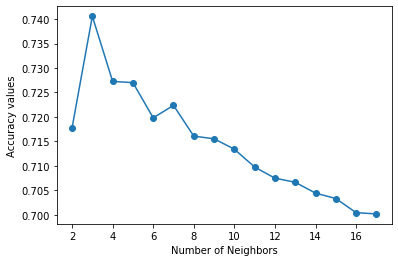

In [ ]:
plt.plot(n_neighbors,acc_values,'o-')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy values')

In [ ]:
knn_model=KNeighborsClassifier(n_neighbors=3,metric='minkowski')
knn_model.fit(X_train,y_train)
y_pred=knn_model.predict(X_test)
print('Accuracy on training data is:',knn_model.score(X_train,y_train))
print('Accuracy is:',accuracy_score(y_test,y_pred))
print('Precision is:',precision_score(y_test,y_pred,average='weighted'))
print('Recall is:',recall_score(y_test,y_pred,average='weighted'))
print('f1 score is:',f1_score(y_test,y_pred,average='weighted'))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy on training data is: 0.8758797262534582
Accuracy is: 0.7405719139297848
Precision is: 0.7292513393587499
Recall is: 0.7405719139297848
f1 score is: 0.7271405096440631
              precision    recall  f1-score   support

           0       0.75      0.93      0.83      8922
           1       0.62      0.49      0.54      8897
           2       0.82      0.96      0.88      8619
           3       0.73      0.59      0.65      8882

    accuracy                           0.74     35320
   macro avg       0.73      0.74      0.73     35320
weighted avg       0.73      0.74      0.73     35320

[[8323  402   71  126]
 [1912 4317  991 1677]
 [  37  136 8288  158]
 [ 768 2093  792 5229]]


>Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()
rf_model.fit(X_train,y_train)
y_pred=rf_model.predict(X_test)
print('Accuracy on training data is:',rf_model.score(X_train,y_train))
print('Accuracy is:',accuracy_score(y_test,y_pred))
print('Precision is:',precision_score(y_test,y_pred,average='weighted'))
print('Recall is:',recall_score(y_test,y_pred,average='weighted'))
print('f1 score is:',f1_score(y_test,y_pred,average='weighted'))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy on training data is: 1.0
Accuracy is: 0.8204416761041903
Precision is: 0.8157979954246816
Recall is: 0.8204416761041903
f1 score is: 0.813913966246463
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      8922
           1       0.74      0.56      0.64      8897
           2       0.91      0.95      0.93      8619
           3       0.76      0.84      0.80      8882

    accuracy                           0.82     35320
   macro avg       0.82      0.82      0.81     35320
weighted avg       0.82      0.82      0.81     35320

[[8313  549    0   60]
 [1343 5022  711 1821]
 [   0   34 8152  433]
 [ 171 1142   78 7491]]


In [ ]:
#Feature Importance
df=pd.DataFrame({'Feature_name':x.columns,'Feature_importance':rf_model.feature_importances_*100})
df.sort_values(by='Feature_importance',ascending=False)

,Feature_name,Feature_importance
0,Ship Mode,21.999337
12,Shipping Cost,8.626374
8,Sales,5.530082
13,Cost,5.342249
1,City,4.475165
2,State,4.121394
7,Product Name,4.115706
11,Profit,4.091056
3,Country,3.486641
16,ordered week of year,3.228643


**FINE** **TUNING** **OF** **HYPERPARAMETERS** **AND** **MODEL**

In [ ]:
#Fine Tuning of Hyperparameters
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
#Random Search CV-> Selecting best params
from sklearn.model_selection import RandomizedSearchCV
rf=RandomForestClassifier()
rf_random=RandomizedSearchCV(estimator=rf,
                            param_distributions={'n_estimators' : [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
                            'max_depth': [int(x) for x in np.linspace(start=10, stop=100, num = 10)],
                            'min_samples_split' : [2, 5, 10],
                            'max_features' : ['auto', 'sqrt'],
                            'min_samples_leaf' : [1, 2, 4],
                            'bootstrap' : [True, False]},n_iter=20,cv=3,random_state=42,verbose=2,n_jobs=-1)
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [ ]:
rf_random.best_score_

0.8149177150601957

In [ ]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 30,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 2000}

In [ ]:
#Final Model after Tuning
rf_model=RandomForestClassifier(bootstrap=False, max_depth=30, max_features= 'auto', min_samples_leaf=1, min_samples_split=2, n_estimators=2000)
rf_model.fit(X_train,y_train)
y_pred=rf_model.predict(X_test)
print('Accuracy on training data is:',rf_model.score(X_train,y_train))
print('Accuracy is:',accuracy_score(y_test,y_pred))
print('Precision is:',precision_score(y_test,y_pred,average='weighted'))
print('Recall is:',recall_score(y_test,y_pred,average='weighted'))
print('f1 score is:',f1_score(y_test,y_pred,average='weighted'))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy on training data is: 1.0
Accuracy is: 0.8375141562853907
Precision is: 0.8344860806369893
Recall is: 0.8375141562853907
f1 score is: 0.8329288556870819
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      8922
           1       0.77      0.61      0.68      8897
           2       0.92      0.95      0.94      8619
           3       0.78      0.86      0.82      8882

    accuracy                           0.84     35320
   macro avg       0.84      0.84      0.83     35320
weighted avg       0.83      0.84      0.83     35320

[[8310  556    0   56]
 [1116 5447  621 1713]
 [   0   38 8166  415]
 [ 129 1047   48 7658]]
